In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './..')
sys.path.insert(0, './../scripts')

In [2]:
from importlib import reload

import pickle

import numpy as np
import tensorflow as tf
import logging
from scipy import linalg

import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from mpl_toolkits.axes_grid1 import make_axes_locatable

import plot_func as pf
import util_func as uf

import dev_ori_sel_RF
from dev_ori_sel_RF import data_dir,integrator_tf,dynamics,run_full_plastic,probe_RFs
from dev_ori_sel_RF.tools import misc,update_params_dict,analysis_tools
import dev_ori_sel_RF.network_full_plastic as network

2023-07-31 15:29:21.034847: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Please install GPU version of TF
Please install GPU version of TF


In [3]:
def get_network_size(config_name):
    config_dict = misc.load_external_params("params_"+config_name)
    config_dict.update({"config_name" : config_name})

    N4 = config_dict["N4"]
    Nlgn = config_dict["Nlgn"]
    Nret = config_dict["Nret"]
    Nlgnpop = 2
    N4pop = config_dict["num_lgn_paths"] // Nlgnpop
    
    return config_dict,N4pop,Nlgnpop,Nret,Nlgn,N4

def get_network_system(Version,config_name):
    if Version == -1:
        config_dict = misc.load_external_params("params_"+config_name,False)
        config_dict.update({
                        "RF_mode" : "initialize",
                        "system" : "one_layer",
                        "Version" : Version,
                        })
        net = network.Network(Version,config_dict,verbose=False)
    else:
        load_location = 'local'
        load_path = data_dir + "layer4/{s}/v{v}/".format(s=config_name,v=Version)
        config_dict = pickle.load(open(load_path + "config_v{v}.p".format(v=Version),"rb"))
        config_dict.update({"config_name" : config_name})
        config_dict["Wlgn_to4_params"].update({
            "W_mode": "load_from_external",
            "load_from_prev_run" : Version})
        net = network.Network(Version,config_dict,load_location=load_location,verbose=False)
    return net.system

# Run

In [5]:
reload(run_full_plastic)
reload(integrator_tf)

config_name = "ffrec_test"

config_dict,N4pop,Nlgnpop,Nret,Nlgn,N4 = get_network_size(config_name)
config_dict.update({"config_name" : config_name,
                    "saving_stepsize" : 1,
                    "runtime" : 16*125})

Version = 24
run_full_plastic.parameter_sweep_ffrec(Version,config_dict,not_saving_temp=False)

Please install GPU version of TF
MISC params_dict params_ffrec_test {'Nret': 32, 'Nlgn': 32, 'N4': 32, 'N23': 1, 'Nvert': 1, 'runtime': 500, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'q_dict': True, 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.0225, 'sigma2': 0.06, 'ampl1': 2.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.03375, 'ampl': 1.0, 'profile':

lgn (4, 1024) tf.Tensor(5.1773605, shape=(), dtype=float32)

Plasticity step: 7, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 7 39.67678 40.59066 39.67832 40.59055 0 0
key dW_on_l4 7 0.83297306 1.201459 0.8330054 1.2014557
key dW_off_l4 7 0.82902336 1.2105331 0.82905555 1.2105299
key dW_e_l4 7 0.7871235 0.8238009 0.7871541 0.82379866
key dW_i_l4 7 -0.8237986 -0.7871541 -0.8237964 -0.78718466
lgn (4, 1024) tf.Tensor(5.3328733, shape=(), dtype=float32)

Plasticity step: 8, exp: 0, input: 0
Comment out next line if running with antolik_etal settings
L4 8 39.496468 40.984848 39.496185 40.985954 0 0
key dW_on_l4 8 0.75967044 1.2331507 0.759665 1.233184
key dW_off_l4 8 0.7125824 1.2707188 0.7125773 1.2707531
key dW_e_l4 8 0.77998555 0.8398789 0.77997994 0.8399016
key dW_i_l4 8 -0.8399016 -0.77997994 -0.8399243 -0.77997434
lgn (4, 1024) tf.Tensor(4.7655807, shape=(), dtype=float32)

Plasticity step: 9, exp: 0, input: 0
Comment out next line if running with a

In [36]:
with np.load('./../dev_ori_sel_RF/data/ffrec/'+config_name+'/v'+str(Version)+'/yt_v'+str(Version)+'.npz') as data:
    print(list(data.keys()))
    print(data['l4t'][1:,:].mean(0))
    print(data['l4t'][1:,:].std(0))
    print(data['l4t'][1:,:].mean(-1))
    print(data['l4t'][1:,:].std(-1))
    print(data['Wt'][1:,:].std(-1))
    l4t = data['l4t'][1:,:]
    l4 = np.mean(data['l4t'][1:,:],0)
    l4std = np.std(data['l4t'][1:,:],0)
    W4_to_4 = data['Wrect'][-1]
    Wlgn_to_4t = data['Wt'][1:,:]
    Wlgn_to_4 = np.mean(data['Wt'][1:,:],0)

['Wt', 'Wrect', 'l4t']
[40.180256 40.16485  40.149254 ... 40.20872  40.20612  40.19821 ]
[0.25980625 0.2749192  0.29796618 ... 0.27885994 0.2633857  0.25744173]
[40.13403  40.04783  39.96413  39.81225  39.97155  39.67     39.93679
 40.144936 40.072098 40.022163 39.77917  40.07479  40.172424 39.984573
 40.04139  40.13847 ]
[0.27489972 0.29262555 0.36782357 0.37849805 0.24004066 0.2694592
 0.35511264 0.1852645  0.35699305 0.26030192 0.32195896 0.2951245
 0.33108142 0.2573606  0.18083109 0.27530473]
[0.00239389 0.00239399 0.00239413 0.00239425 0.0023943  0.00239441
 0.00239452 0.00239458 0.00239473 0.00239485 0.00239498 0.0023951
 0.00239518 0.00239529 0.00239535 0.00239543]


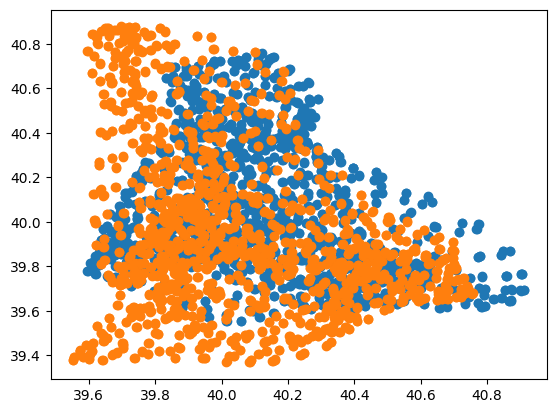

In [23]:
plt.scatter(l4t[0,:],l4t[1,:])
plt.scatter(l4t[1,:],l4t[2,:])

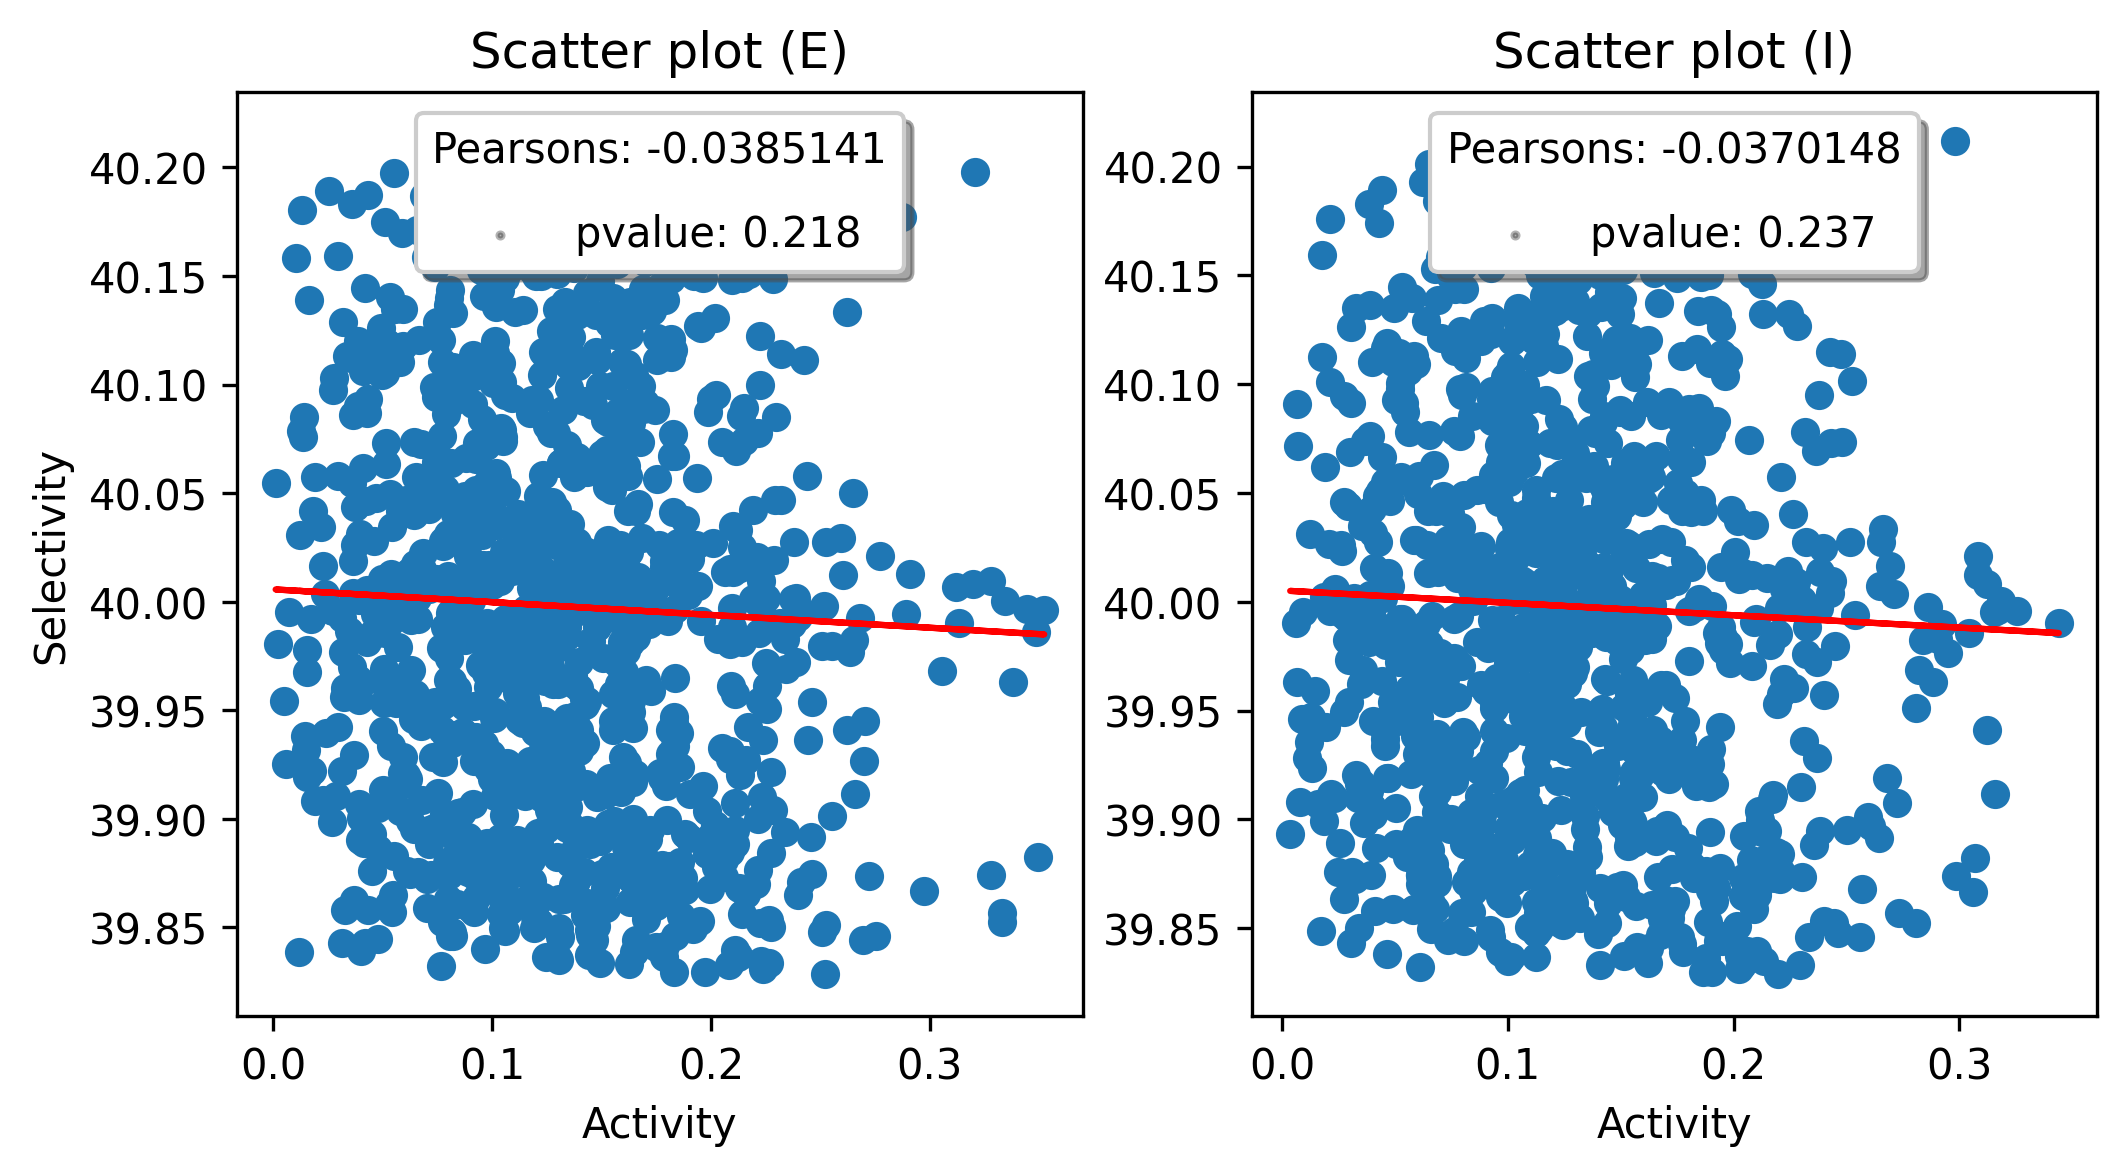

In [35]:
from scipy import stats

N4 = int(np.sqrt(W4_to_4.shape[0]//2))
Nlgn = int(N4)
DA = 1
Wlgn_to_4 = Wlgn_to_4.reshape(4,N4*N4,N4*N4)

fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)
plt.subplot(1,2,1)
ss_e = Wlgn_to_4[0,...] + Wlgn_to_4[1,...]
sd_e = Wlgn_to_4[0,...] - Wlgn_to_4[1,...]
ss_e = ss_e.reshape((N4,N4,Nlgn,Nlgn))
sd_e = sd_e.reshape((N4,N4,Nlgn,Nlgn))
opm_e,Rn_e = analysis_tools.get_response(sd_e,DA)
sel_e = np.abs(opm_e)
sel_e = sel_e.flatten()
plt.scatter(sel_e,l4[:N4*N4])
PEARSON_e,pvalue_e = stats.pearsonr(sel_e, l4[:N4*N4])
m, b = np.polyfit(sel_e, l4[:N4*N4], 1)
plt.plot(sel_e, m*sel_e+b, color='red')
plt.ylabel('Selectivity')
plt.xlabel('Activity')
plt.title('Scatter plot (E)')
plt.scatter([],[],c='k',alpha=0.3,s=2,label='pvalue: ' + str("{0:.3g}".format(pvalue_e)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
           ncol=2, fancybox=True, shadow=True,scatterpoints=1, frameon=True, labelspacing=1,
           title='Pearsons: '+str("{0:.6g}".format(PEARSON_e)))

plt.subplot(1,2,2)
ss_i = Wlgn_to_4[2,...] + Wlgn_to_4[3,...]
sd_i = Wlgn_to_4[2,...] - Wlgn_to_4[3,...]
ss_i = ss_i.reshape((N4,N4,Nlgn,Nlgn))
sd_i = sd_i.reshape((N4,N4,Nlgn,Nlgn))
opm_i,Rn_i = analysis_tools.get_response(sd_i,DA)
sel_i = np.abs(opm_i)
sel_i = sel_i.flatten()
plt.scatter(sel_i,l4[N4*N4:])
PEARSON_i,pvalue_i = stats.pearsonr(sel_i, l4[N4*N4:])
m, b = np.polyfit(sel_i, l4[N4*N4:], 1)
plt.plot(sel_i, m*sel_i+b, color='red')
plt.xlabel('Activity')
plt.title('Scatter plot (I)')
plt.scatter([],[],c='k',alpha=0.3,s=2,label='pvalue: ' + str("{0:.3g}".format(pvalue_i)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
           ncol=2, fancybox=True, shadow=True,scatterpoints=1, frameon=True, labelspacing=1,
           title='Pearsons: '+str("{0:.6g}".format(PEARSON_i)))

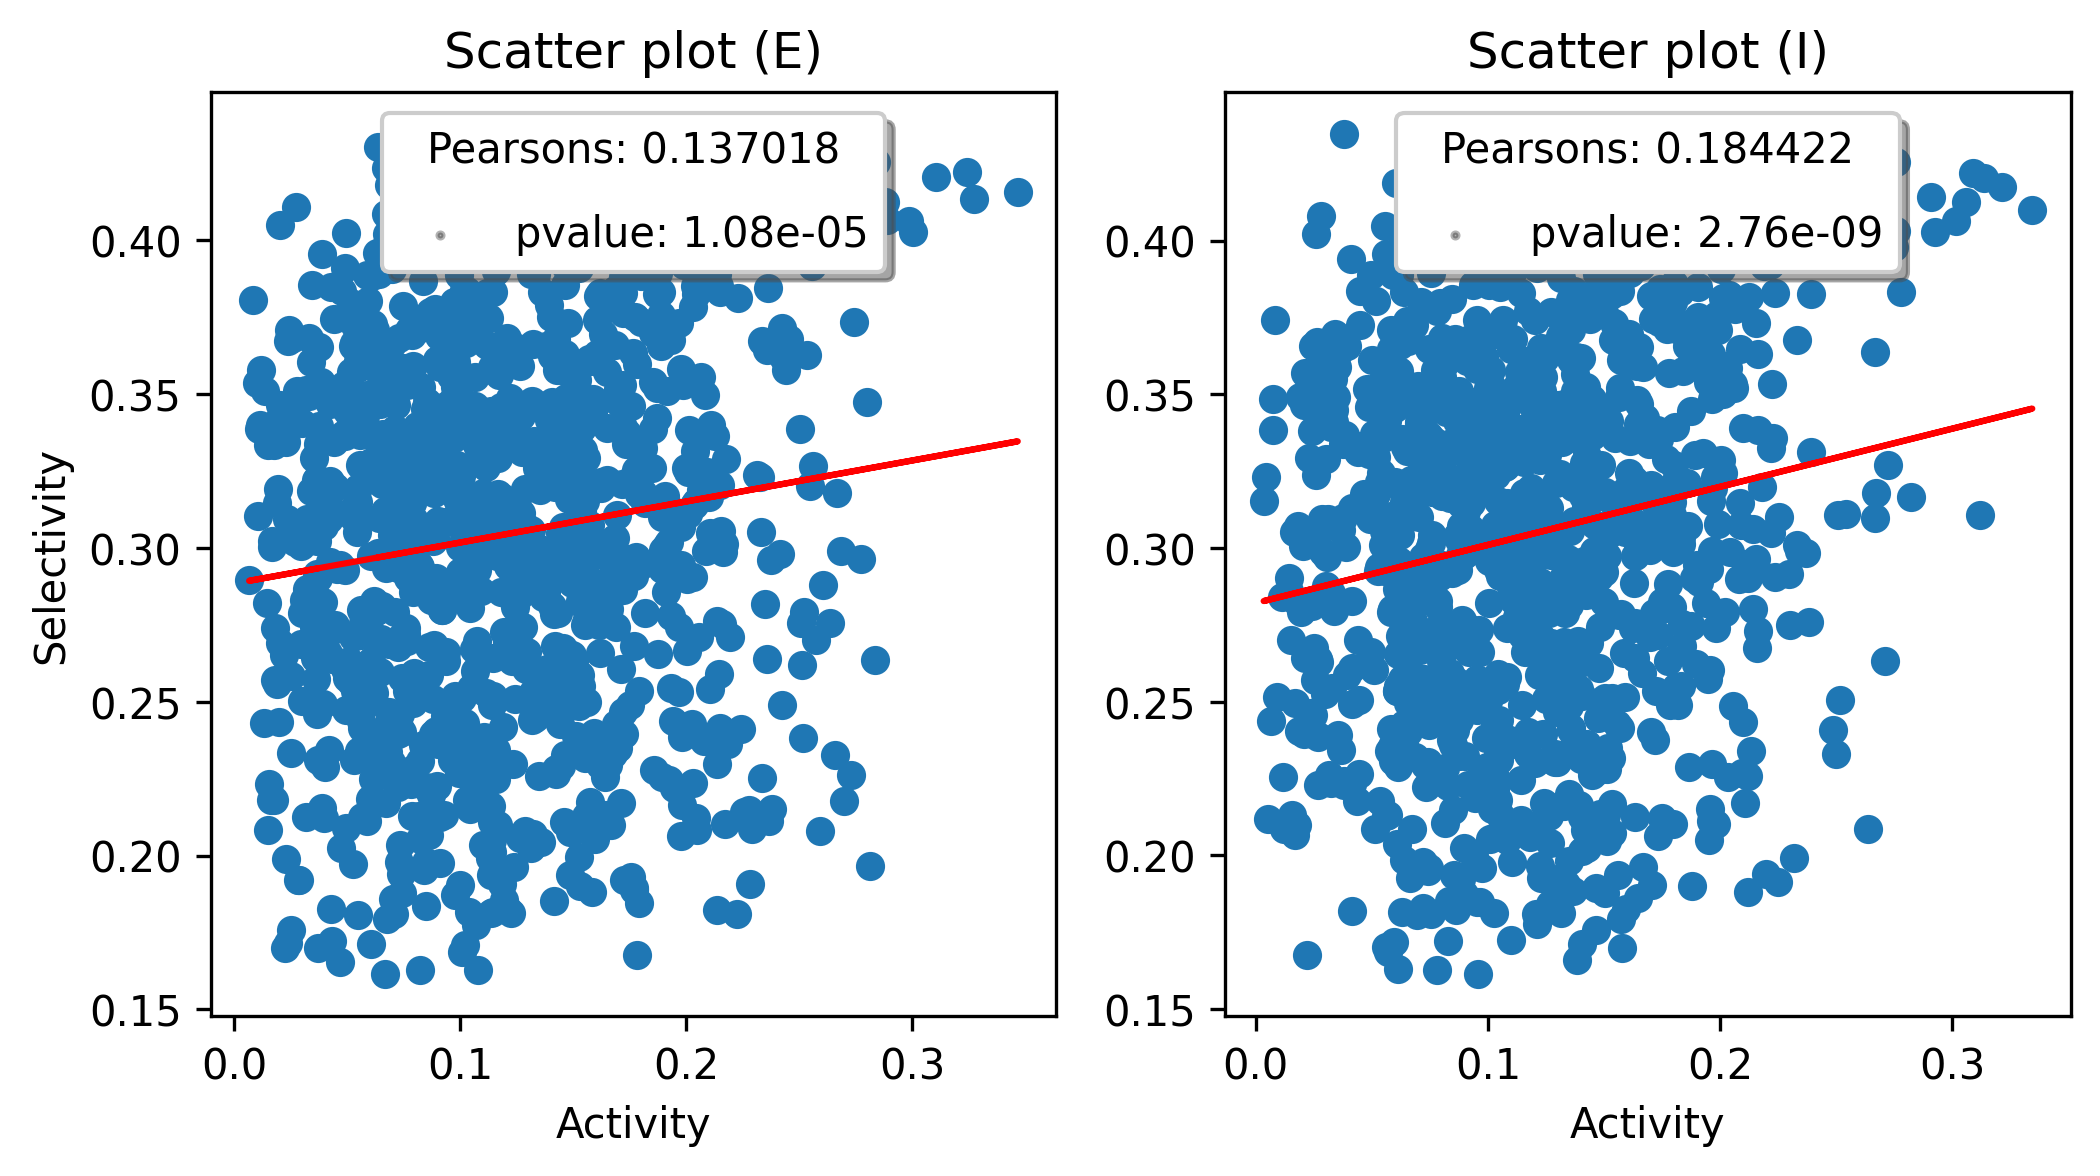

In [37]:
from scipy import stats

N4 = int(np.sqrt(W4_to_4.shape[0]//2))
Nlgn = int(N4)
DA = 1
Wlgn_to_4 = Wlgn_to_4.reshape(4,N4*N4,N4*N4)

fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)
plt.subplot(1,2,1)
ss_e = Wlgn_to_4[0,...] + Wlgn_to_4[1,...]
sd_e = Wlgn_to_4[0,...] - Wlgn_to_4[1,...]
ss_e = ss_e.reshape((N4,N4,Nlgn,Nlgn))
sd_e = sd_e.reshape((N4,N4,Nlgn,Nlgn))
opm_e,Rn_e = analysis_tools.get_response(sd_e,DA)
sel_e = np.abs(opm_e)
sel_e = sel_e.flatten()
plt.scatter(sel_e,l4std[:N4*N4])
PEARSON_e,pvalue_e = stats.pearsonr(sel_e, l4std[:N4*N4])
m, b = np.polyfit(sel_e, l4std[:N4*N4], 1)
plt.plot(sel_e, m*sel_e+b, color='red')
plt.ylabel('Selectivity')
plt.xlabel('Activity')
plt.title('Scatter plot (E)')
plt.scatter([],[],c='k',alpha=0.3,s=2,label='pvalue: ' + str("{0:.3g}".format(pvalue_e)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
           ncol=2, fancybox=True, shadow=True,scatterpoints=1, frameon=True, labelspacing=1,
           title='Pearsons: '+str("{0:.6g}".format(PEARSON_e)))

plt.subplot(1,2,2)
ss_i = Wlgn_to_4[2,...] + Wlgn_to_4[3,...]
sd_i = Wlgn_to_4[2,...] - Wlgn_to_4[3,...]
ss_i = ss_i.reshape((N4,N4,Nlgn,Nlgn))
sd_i = sd_i.reshape((N4,N4,Nlgn,Nlgn))
opm_i,Rn_i = analysis_tools.get_response(sd_i,DA)
sel_i = np.abs(opm_i)
sel_i = sel_i.flatten()
plt.scatter(sel_i,l4std[N4*N4:])
PEARSON_i,pvalue_i = stats.pearsonr(sel_i, l4std[N4*N4:])
m, b = np.polyfit(sel_i, l4std[N4*N4:], 1)
plt.plot(sel_i, m*sel_i+b, color='red')
plt.xlabel('Activity')
plt.title('Scatter plot (I)')
plt.scatter([],[],c='k',alpha=0.3,s=2,label='pvalue: ' + str("{0:.3g}".format(pvalue_i)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
           ncol=2, fancybox=True, shadow=True,scatterpoints=1, frameon=True, labelspacing=1,
           title='Pearsons: '+str("{0:.6g}".format(PEARSON_i)))

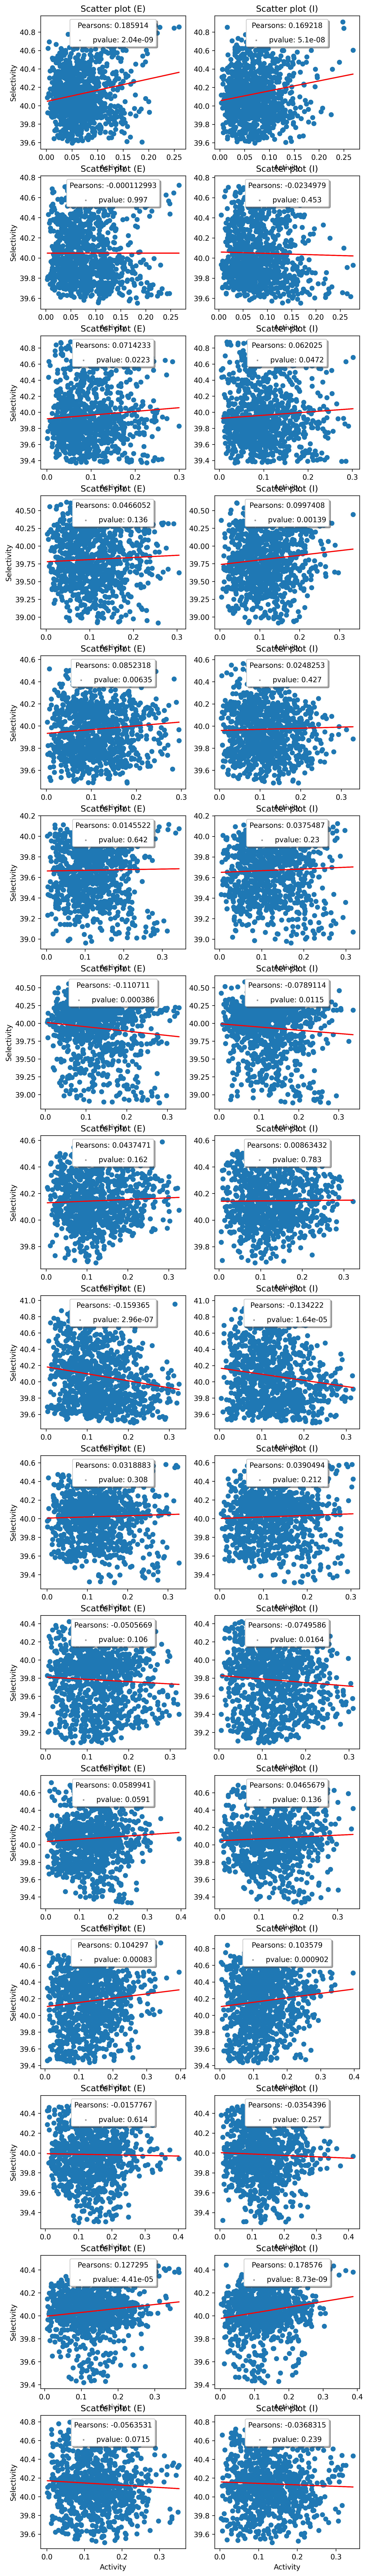

In [34]:
from scipy import stats

fig,axs = plt.subplots(16,2,figsize=(8,4*16),dpi=300)

for nt in range(16):
    N4 = int(np.sqrt(W4_to_4.shape[0]//2))
    Nlgn = int(N4)
    DA = 1
    Wlgn_to_4 = Wlgn_to_4t[nt].reshape(4,N4*N4,N4*N4)

    fig.subplots_adjust(hspace=.2, wspace=.2)
    plt.subplot(16,2,2*nt+1)
    ss_e = Wlgn_to_4[0,...] + Wlgn_to_4[1,...]
    sd_e = Wlgn_to_4[0,...] - Wlgn_to_4[1,...]
    ss_e = ss_e.reshape((N4,N4,Nlgn,Nlgn))
    sd_e = sd_e.reshape((N4,N4,Nlgn,Nlgn))
    opm_e,Rn_e = analysis_tools.get_response(sd_e,DA)
    sel_e = np.abs(opm_e)
    sel_e = sel_e.flatten()
    plt.scatter(sel_e,l4t[nt,:N4*N4])
    PEARSON_e,pvalue_e = stats.pearsonr(sel_e, l4t[nt,:N4*N4])
    m, b = np.polyfit(sel_e, l4t[nt,:N4*N4], 1)
    plt.plot(sel_e, m*sel_e+b, color='red')
    plt.ylabel('Selectivity')
    plt.xlabel('Activity')
    plt.title('Scatter plot (E)')
    plt.scatter([],[],c='k',alpha=0.3,s=2,label='pvalue: ' + str("{0:.3g}".format(pvalue_e)))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
               ncol=2, fancybox=True, shadow=True,scatterpoints=1, frameon=True, labelspacing=1,
               title='Pearsons: '+str("{0:.6g}".format(PEARSON_e)))

    plt.subplot(16,2,2*nt+2)
    ss_i = Wlgn_to_4[2,...] + Wlgn_to_4[3,...]
    sd_i = Wlgn_to_4[2,...] - Wlgn_to_4[3,...]
    ss_i = ss_i.reshape((N4,N4,Nlgn,Nlgn))
    sd_i = sd_i.reshape((N4,N4,Nlgn,Nlgn))
    opm_i,Rn_i = analysis_tools.get_response(sd_i,DA)
    sel_i = np.abs(opm_i)
    sel_i = sel_i.flatten()
    plt.scatter(sel_i,l4t[nt,N4*N4:])
    PEARSON_i,pvalue_i = stats.pearsonr(sel_i, l4t[nt,N4*N4:])
    m, b = np.polyfit(sel_i, l4t[nt,N4*N4:], 1)
    plt.plot(sel_i, m*sel_i+b, color='red')
    plt.xlabel('Activity')
    plt.title('Scatter plot (I)')
    plt.scatter([],[],c='k',alpha=0.3,s=2,label='pvalue: ' + str("{0:.3g}".format(pvalue_i)))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
               ncol=2, fancybox=True, shadow=True,scatterpoints=1, frameon=True, labelspacing=1,
               title='Pearsons: '+str("{0:.6g}".format(PEARSON_i)))

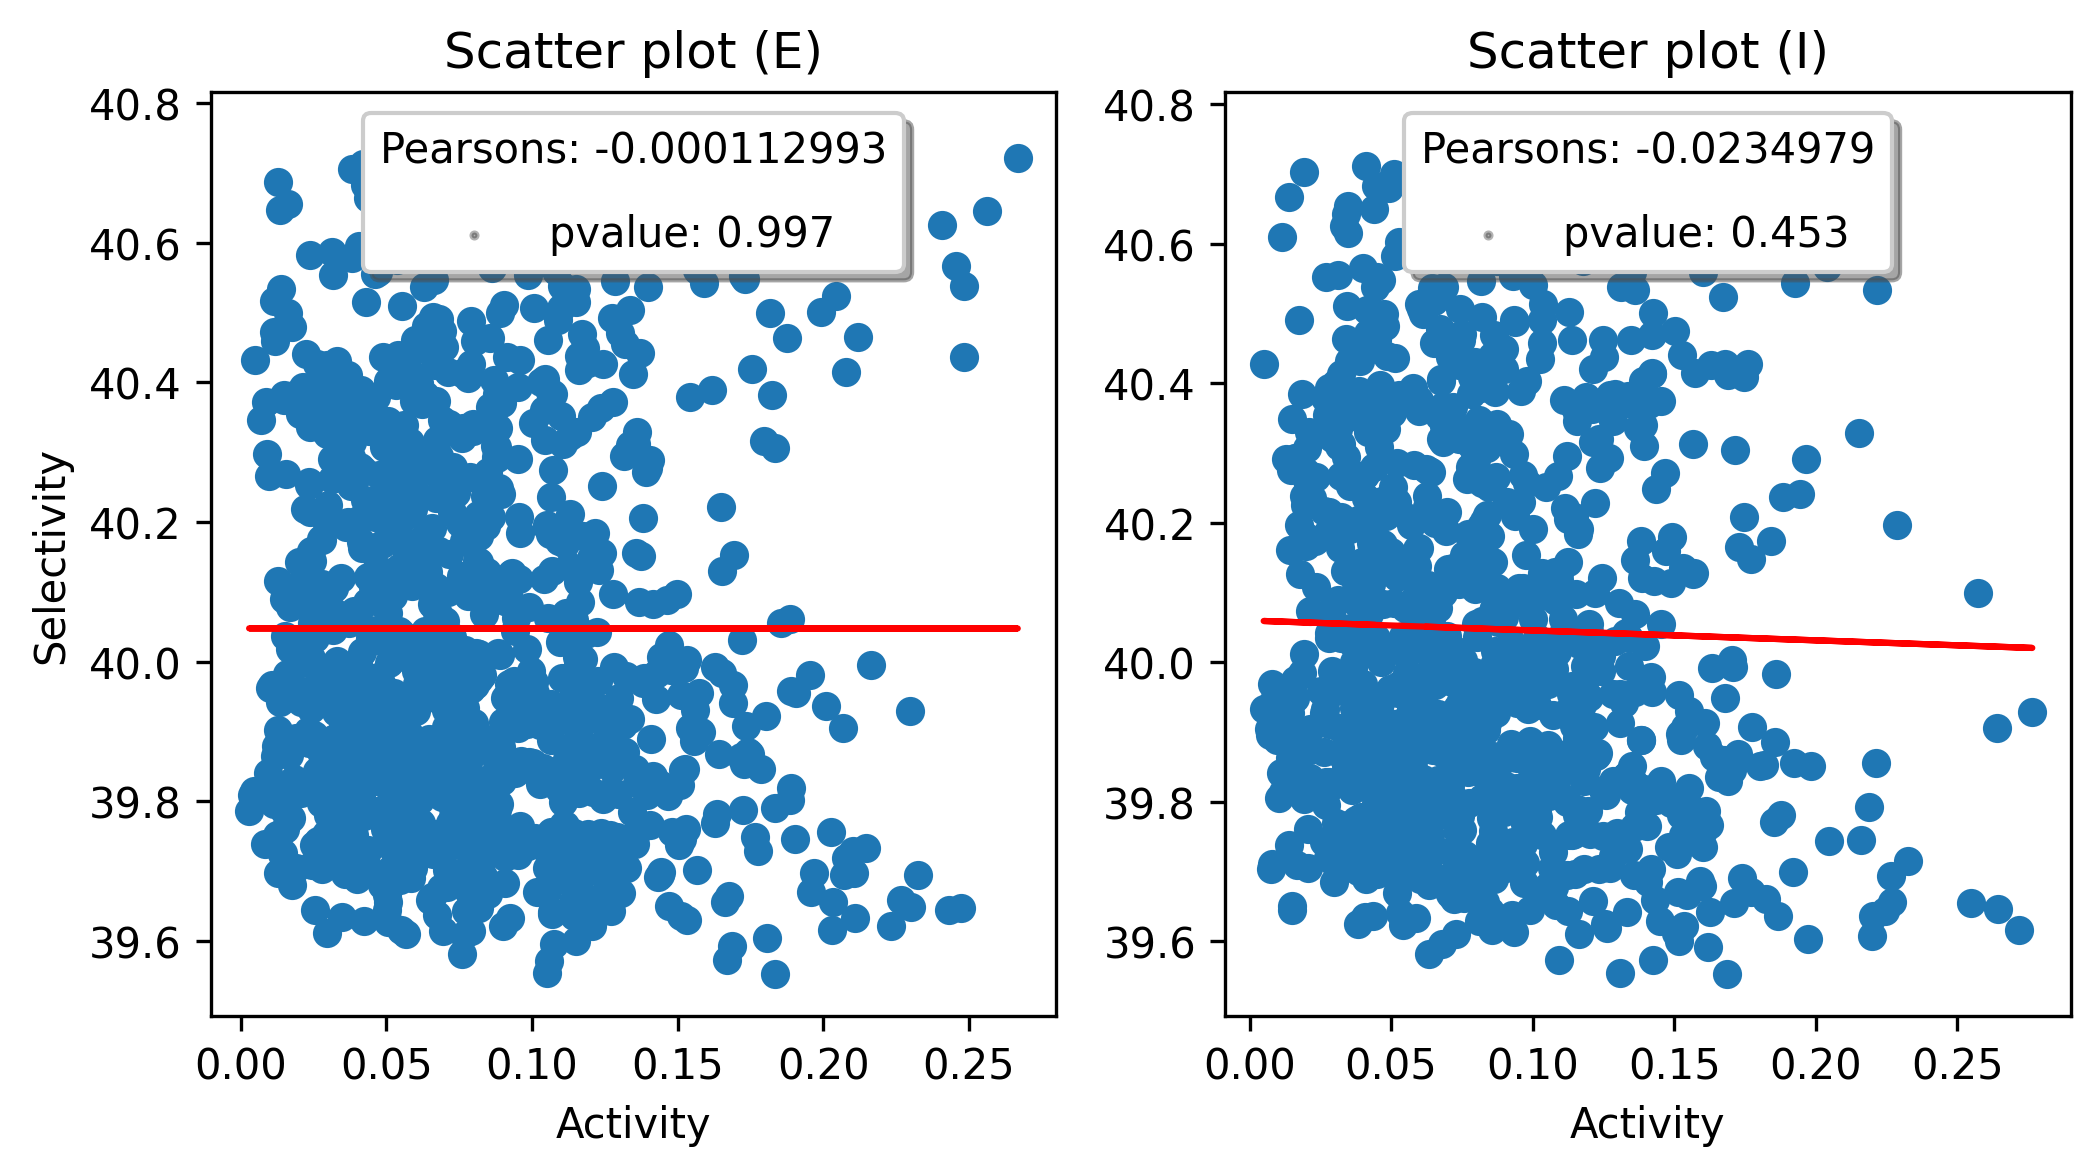

In [32]:
from scipy import stats

nt = 1

N4 = int(np.sqrt(W4_to_4.shape[0]//2))
Nlgn = int(N4)
DA = 1
Wlgn_to_4 = Wlgn_to_4t[nt].reshape(4,N4*N4,N4*N4)

fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)
plt.subplot(1,2,1)
ss_e = Wlgn_to_4[0,...] + Wlgn_to_4[1,...]
sd_e = Wlgn_to_4[0,...] - Wlgn_to_4[1,...]
ss_e = ss_e.reshape((N4,N4,Nlgn,Nlgn))
sd_e = sd_e.reshape((N4,N4,Nlgn,Nlgn))
opm_e,Rn_e = analysis_tools.get_response(sd_e,DA)
sel_e = np.abs(opm_e)
sel_e = sel_e.flatten()
plt.scatter(sel_e,l4t[nt,:N4*N4])
PEARSON_e,pvalue_e = stats.pearsonr(sel_e, l4t[nt,:N4*N4])
m, b = np.polyfit(sel_e, l4t[nt,:N4*N4], 1)
plt.plot(sel_e, m*sel_e+b, color='red')
plt.ylabel('Selectivity')
plt.xlabel('Activity')
plt.title('Scatter plot (E)')
plt.scatter([],[],c='k',alpha=0.3,s=2,label='pvalue: ' + str("{0:.3g}".format(pvalue_e)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
           ncol=2, fancybox=True, shadow=True,scatterpoints=1, frameon=True, labelspacing=1,
           title='Pearsons: '+str("{0:.6g}".format(PEARSON_e)))

plt.subplot(1,2,2)
ss_i = Wlgn_to_4[2,...] + Wlgn_to_4[3,...]
sd_i = Wlgn_to_4[2,...] - Wlgn_to_4[3,...]
ss_i = ss_i.reshape((N4,N4,Nlgn,Nlgn))
sd_i = sd_i.reshape((N4,N4,Nlgn,Nlgn))
opm_i,Rn_i = analysis_tools.get_response(sd_i,DA)
sel_i = np.abs(opm_i)
sel_i = sel_i.flatten()
plt.scatter(sel_i,l4t[nt,N4*N4:])
PEARSON_i,pvalue_i = stats.pearsonr(sel_i, l4t[nt,N4*N4:])
m, b = np.polyfit(sel_i, l4t[nt,N4*N4:], 1)
plt.plot(sel_i, m*sel_i+b, color='red')
plt.xlabel('Activity')
plt.title('Scatter plot (I)')
plt.scatter([],[],c='k',alpha=0.3,s=2,label='pvalue: ' + str("{0:.3g}".format(pvalue_i)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
           ncol=2, fancybox=True, shadow=True,scatterpoints=1, frameon=True, labelspacing=1,
           title='Pearsons: '+str("{0:.6g}".format(PEARSON_i)))

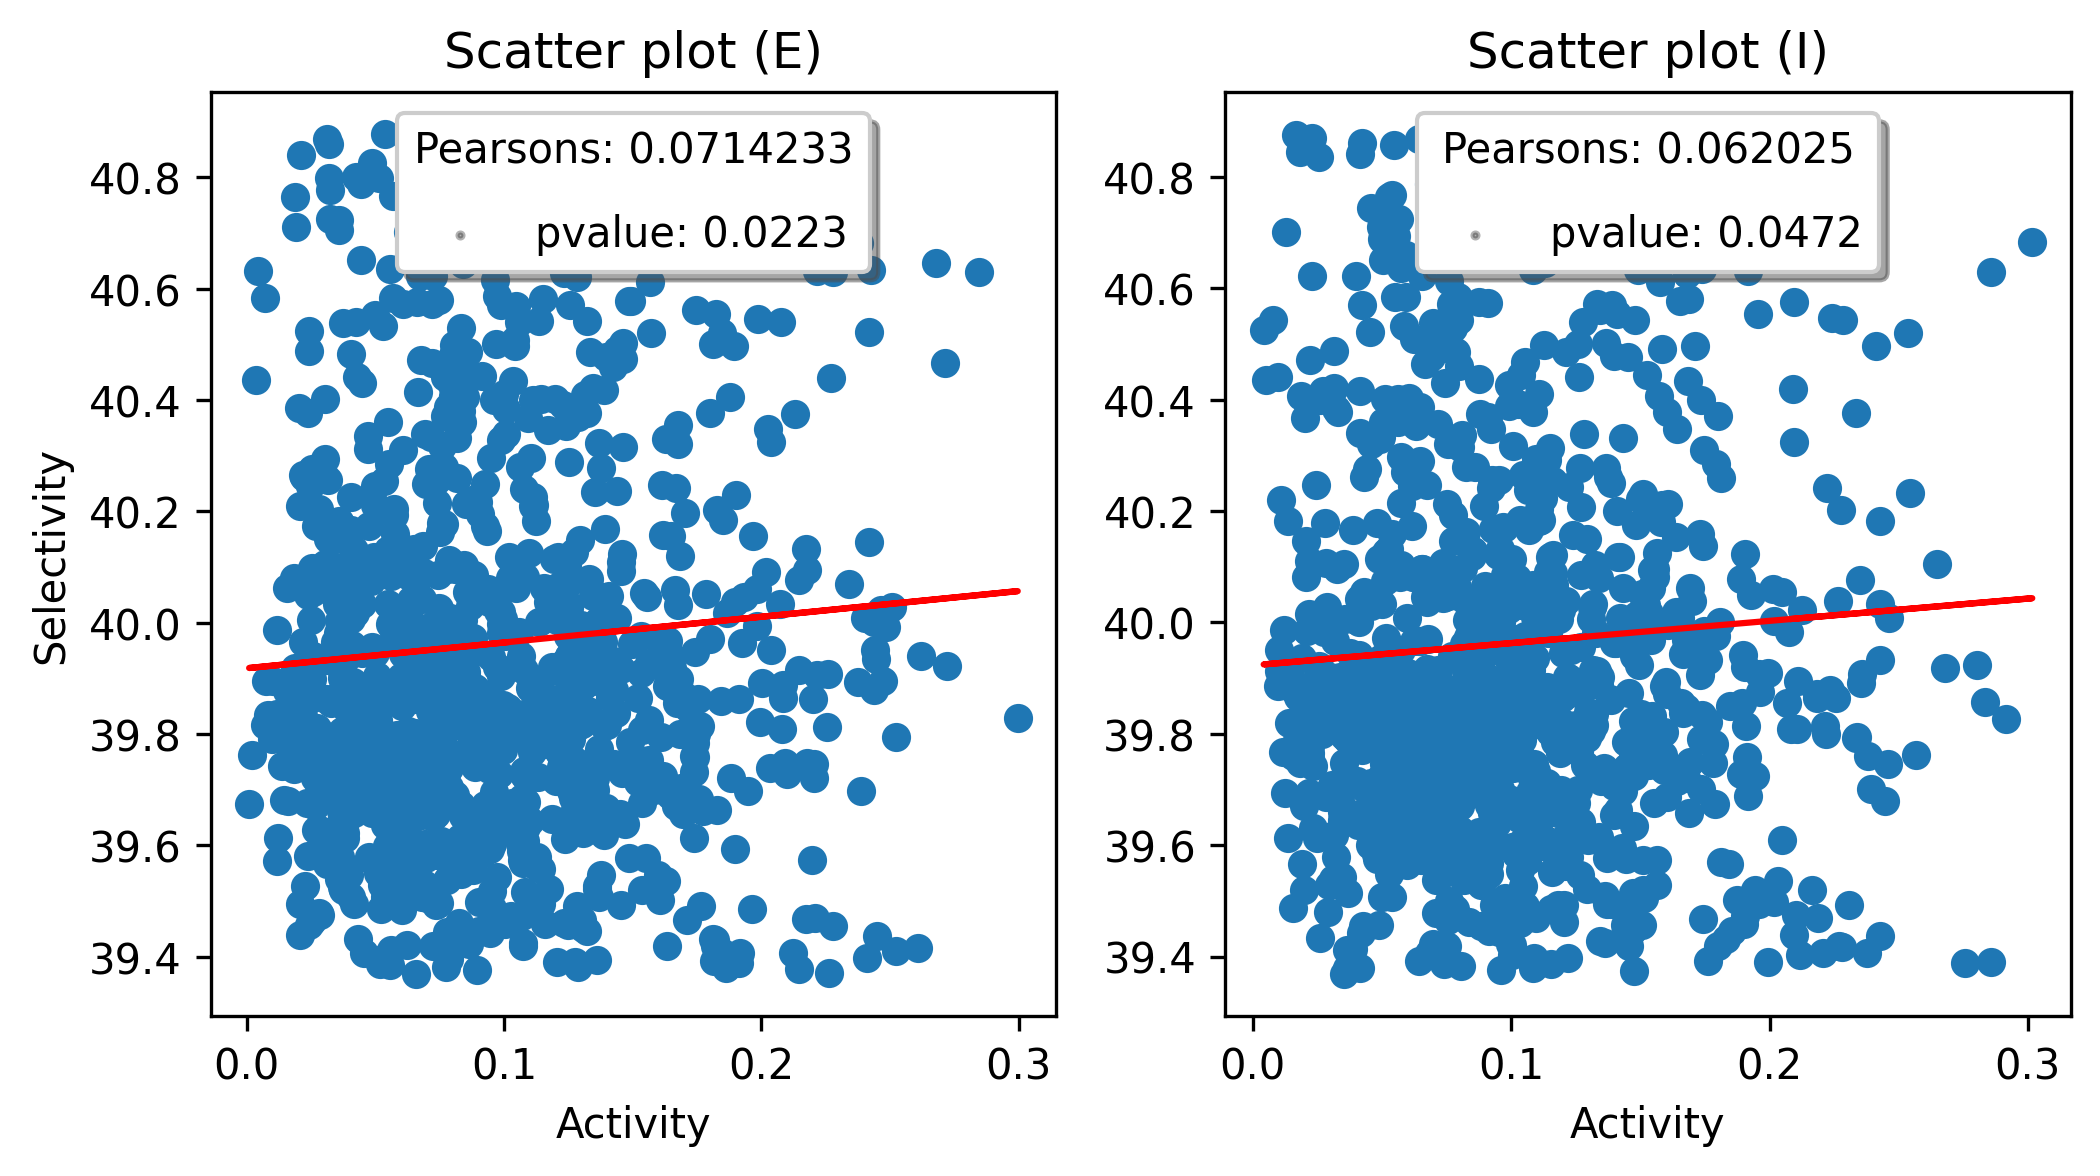

In [33]:
from scipy import stats

nt = 2

N4 = int(np.sqrt(W4_to_4.shape[0]//2))
Nlgn = int(N4)
DA = 1
Wlgn_to_4 = Wlgn_to_4t[nt].reshape(4,N4*N4,N4*N4)

fig,axs = plt.subplots(1,2,figsize=(8,4),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)
plt.subplot(1,2,1)
ss_e = Wlgn_to_4[0,...] + Wlgn_to_4[1,...]
sd_e = Wlgn_to_4[0,...] - Wlgn_to_4[1,...]
ss_e = ss_e.reshape((N4,N4,Nlgn,Nlgn))
sd_e = sd_e.reshape((N4,N4,Nlgn,Nlgn))
opm_e,Rn_e = analysis_tools.get_response(sd_e,DA)
sel_e = np.abs(opm_e)
sel_e = sel_e.flatten()
plt.scatter(sel_e,l4t[nt,:N4*N4])
PEARSON_e,pvalue_e = stats.pearsonr(sel_e, l4t[nt,:N4*N4])
m, b = np.polyfit(sel_e, l4t[nt,:N4*N4], 1)
plt.plot(sel_e, m*sel_e+b, color='red')
plt.ylabel('Selectivity')
plt.xlabel('Activity')
plt.title('Scatter plot (E)')
plt.scatter([],[],c='k',alpha=0.3,s=2,label='pvalue: ' + str("{0:.3g}".format(pvalue_e)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
           ncol=2, fancybox=True, shadow=True,scatterpoints=1, frameon=True, labelspacing=1,
           title='Pearsons: '+str("{0:.6g}".format(PEARSON_e)))

plt.subplot(1,2,2)
ss_i = Wlgn_to_4[2,...] + Wlgn_to_4[3,...]
sd_i = Wlgn_to_4[2,...] - Wlgn_to_4[3,...]
ss_i = ss_i.reshape((N4,N4,Nlgn,Nlgn))
sd_i = sd_i.reshape((N4,N4,Nlgn,Nlgn))
opm_i,Rn_i = analysis_tools.get_response(sd_i,DA)
sel_i = np.abs(opm_i)
sel_i = sel_i.flatten()
plt.scatter(sel_i,l4t[nt,N4*N4:])
PEARSON_i,pvalue_i = stats.pearsonr(sel_i, l4t[nt,N4*N4:])
m, b = np.polyfit(sel_i, l4t[nt,N4*N4:], 1)
plt.plot(sel_i, m*sel_i+b, color='red')
plt.xlabel('Activity')
plt.title('Scatter plot (I)')
plt.scatter([],[],c='k',alpha=0.3,s=2,label='pvalue: ' + str("{0:.3g}".format(pvalue_i)))
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.0),
           ncol=2, fancybox=True, shadow=True,scatterpoints=1, frameon=True, labelspacing=1,
           title='Pearsons: '+str("{0:.6g}".format(PEARSON_i)))

In [6]:
config_name = "ffrec_test"

config_dict = misc.load_external_params("params_"+config_name)
config_dict.update({"config_name" : config_name})

config_dict["Wlgn_to4_params"].update({
    "W_mode": "load_from_external",
    "load_from_prev_run" : 0})
if "2pop" in config_dict["W4to4_params"]["Wrec_mode"]:
    config_dict["W4to4_params"].update({
        "Wrec_mode": "load_from_external2pop"})
else:
    config_dict["W4to4_params"].update({
        "Wrec_mode": "load_from_external"})

reload(run_full_plastic)
reload(integrator_tf)
Version = 1
run_full_plastic.parameter_sweep_ffrec(Version,config_dict,not_saving_temp=True)

MISC params_dict params_ffrec_test {'Nret': 32, 'Nlgn': 32, 'N4': 32, 'N23': 1, 'Nvert': 1, 'runtime': 32000, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'q_dict': True, 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.0225, 'sigma2': 0.06, 'ampl1': 2.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.03375, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity


KeyboardInterrupt



# Examine Final Weights

In [10]:
config_name = "ffrec_test1"
Version = 0

# with np.load('./../dev_ori_sel_RF/data/ffrec/'+config_name+'/v'+Version+'/y_v'+Version+'.npz') as data:
#     print(list(data.keys()))
#     print(data['Wrec'].shape)
#     Wlgnto4 = data['W'].reshape(-1,N4**2,Nlgn**2).reshape(N4pop,Nlgnpop,N4,N4,Nlgn,Nlgn)
#     W4to4 = data['Wrec'].reshape(N4pop,N4,N4,N4pop,N4,N4).transpose((0,3,1,2,4,5))

reload(uf)

_,Wlgnto4,arbor_on,arbor_off,arbor2,_,W4to4,arbor4to4,_ = uf.get_network_system_ffrec(Version,config_name)

(4, 1024, 1024)


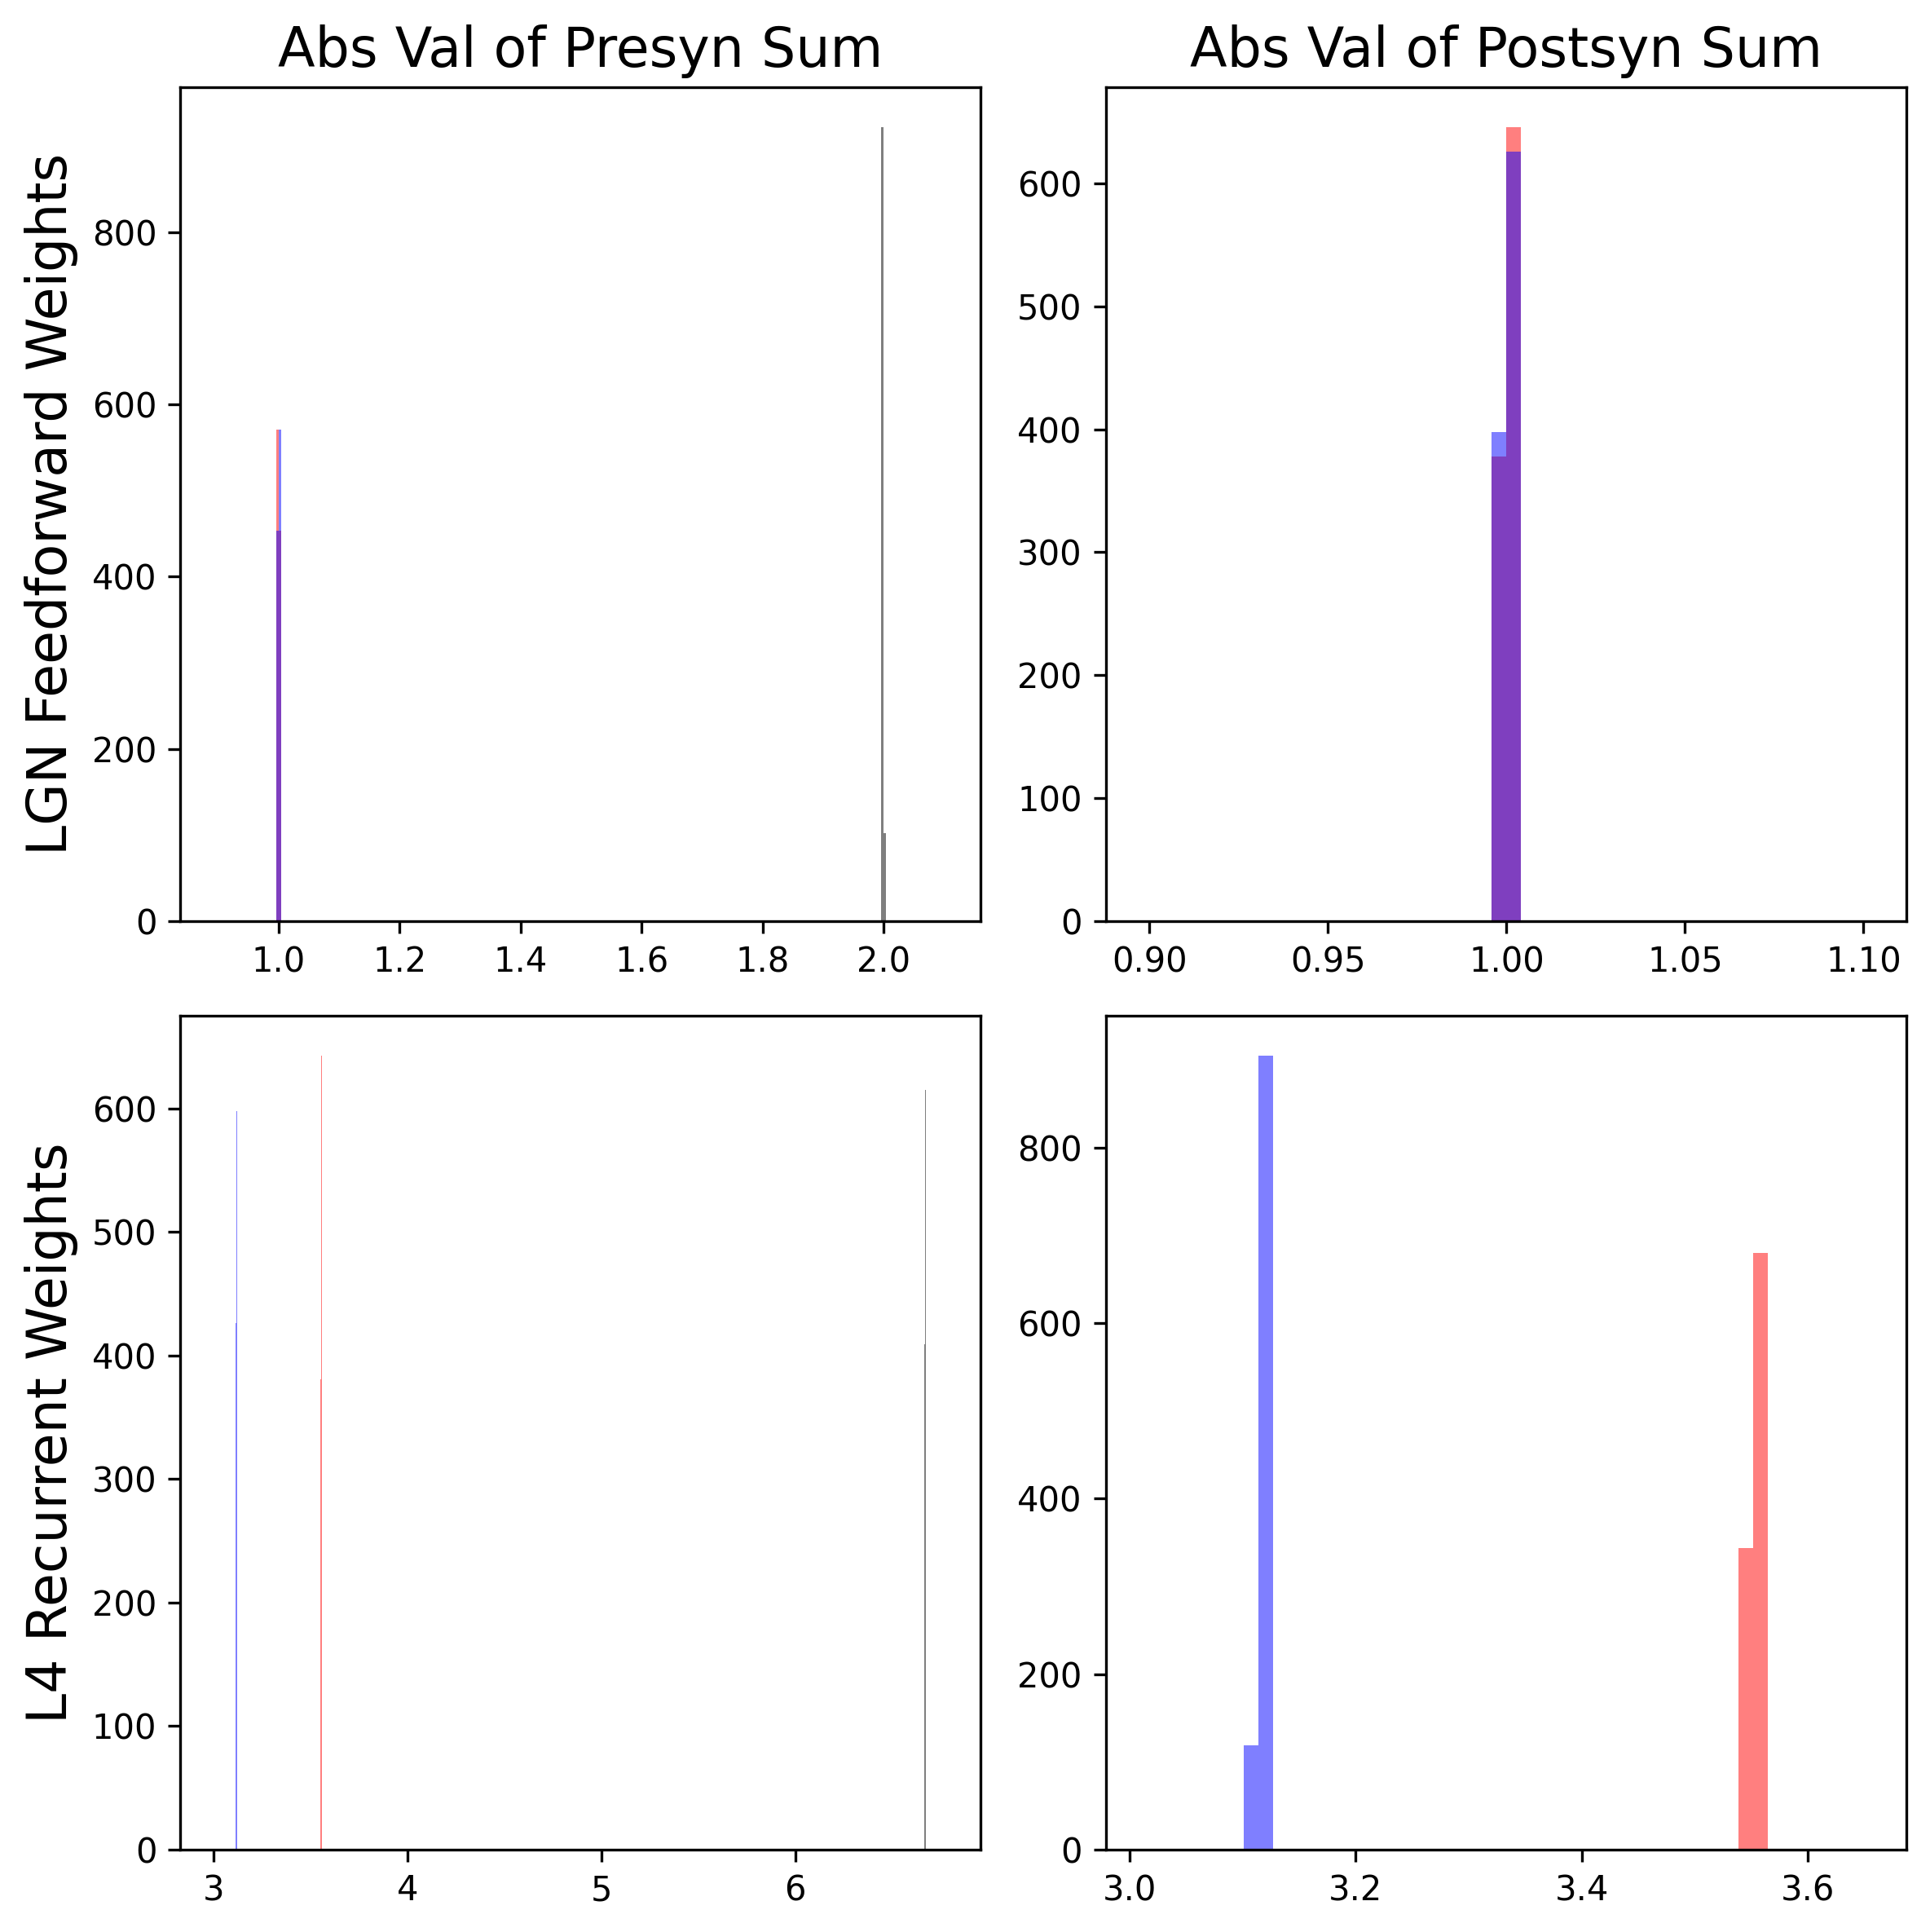

In [11]:
print(Wlgnto4.shape)
Wlgnto4.reshape(N4pop,Nlgnpop,N4*N4,Nlgn*Nlgn)
                
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

Wpresum = Wlgnto4.reshape(N4pop,Nlgnpop,N4**2,Nlgn**2).sum((3))
Wpstsum = Wlgnto4.reshape(N4pop,Nlgnpop,N4**2,Nlgn**2).sum((2))
for i in range(2):
    axs[0,0].hist(Wpresum[0,i],
                  bins=np.linspace(np.min(Wpresum[0,i])-0.1,np.max(Wpresum[0,i])+0.1,51),
                  density=False,color=['r','b'][i],alpha=0.5)
    axs[0,1].hist(Wpstsum[0,i],
                  bins=np.linspace(np.min(Wpstsum)-0.1,np.max(Wpstsum)+0.1,51),
                  density=False,color=['r','b'][i],alpha=0.5)
axs[0,0].hist(Wpresum[0].sum(0),
              bins=np.linspace(np.min(Wpresum[0].sum(0))-0.1,np.max(Wpresum[0].sum(0))+0.1,51),
              density=False,color='k',alpha=0.5)

Wpresum = np.abs(W4to4).reshape(N4pop,N4**2,N4pop,N4**2).transpose((0,2,1,3)).sum((3))
Wpstsum = np.abs(W4to4).reshape(N4pop,N4**2,N4pop,N4**2).transpose((0,2,1,3)).sum((2))
for i in range(2):
    axs[1,0].hist(Wpresum[0,i],
                  bins=np.linspace(np.min(Wpresum[0,i])-0.1,np.max(Wpresum[0,i])+0.1,51),
                  density=False,color=['r','b'][i],alpha=0.5)
    axs[1,1].hist(Wpstsum[0,i],
                  bins=np.linspace(np.min(Wpstsum)-0.1,np.max(Wpstsum)+0.1,51),
                  density=False,color=['r','b'][i],alpha=0.5)
axs[1,0].hist(Wpresum[0].sum(0),
              bins=np.linspace(np.min(Wpresum[0].sum(0))-0.1,np.max(Wpresum[0].sum(0))+0.1,51),
              density=False,color='k',alpha=0.5)

axs[0,0].set_ylabel('LGN Feedforward Weights',fontsize=16)
axs[1,0].set_ylabel('L4 Recurrent Weights',fontsize=16)
axs[0,0].set_title('Abs Val of Presyn Sum',fontsize=16)
axs[0,1].set_title('Abs Val of Postsyn Sum',fontsize=16)

# fig.suptitle(r'Sum of Incoming and Outgoing Connections')
fig.tight_layout()

Text(0.5, 1.0, 'LGN Off Cell (Pre)')

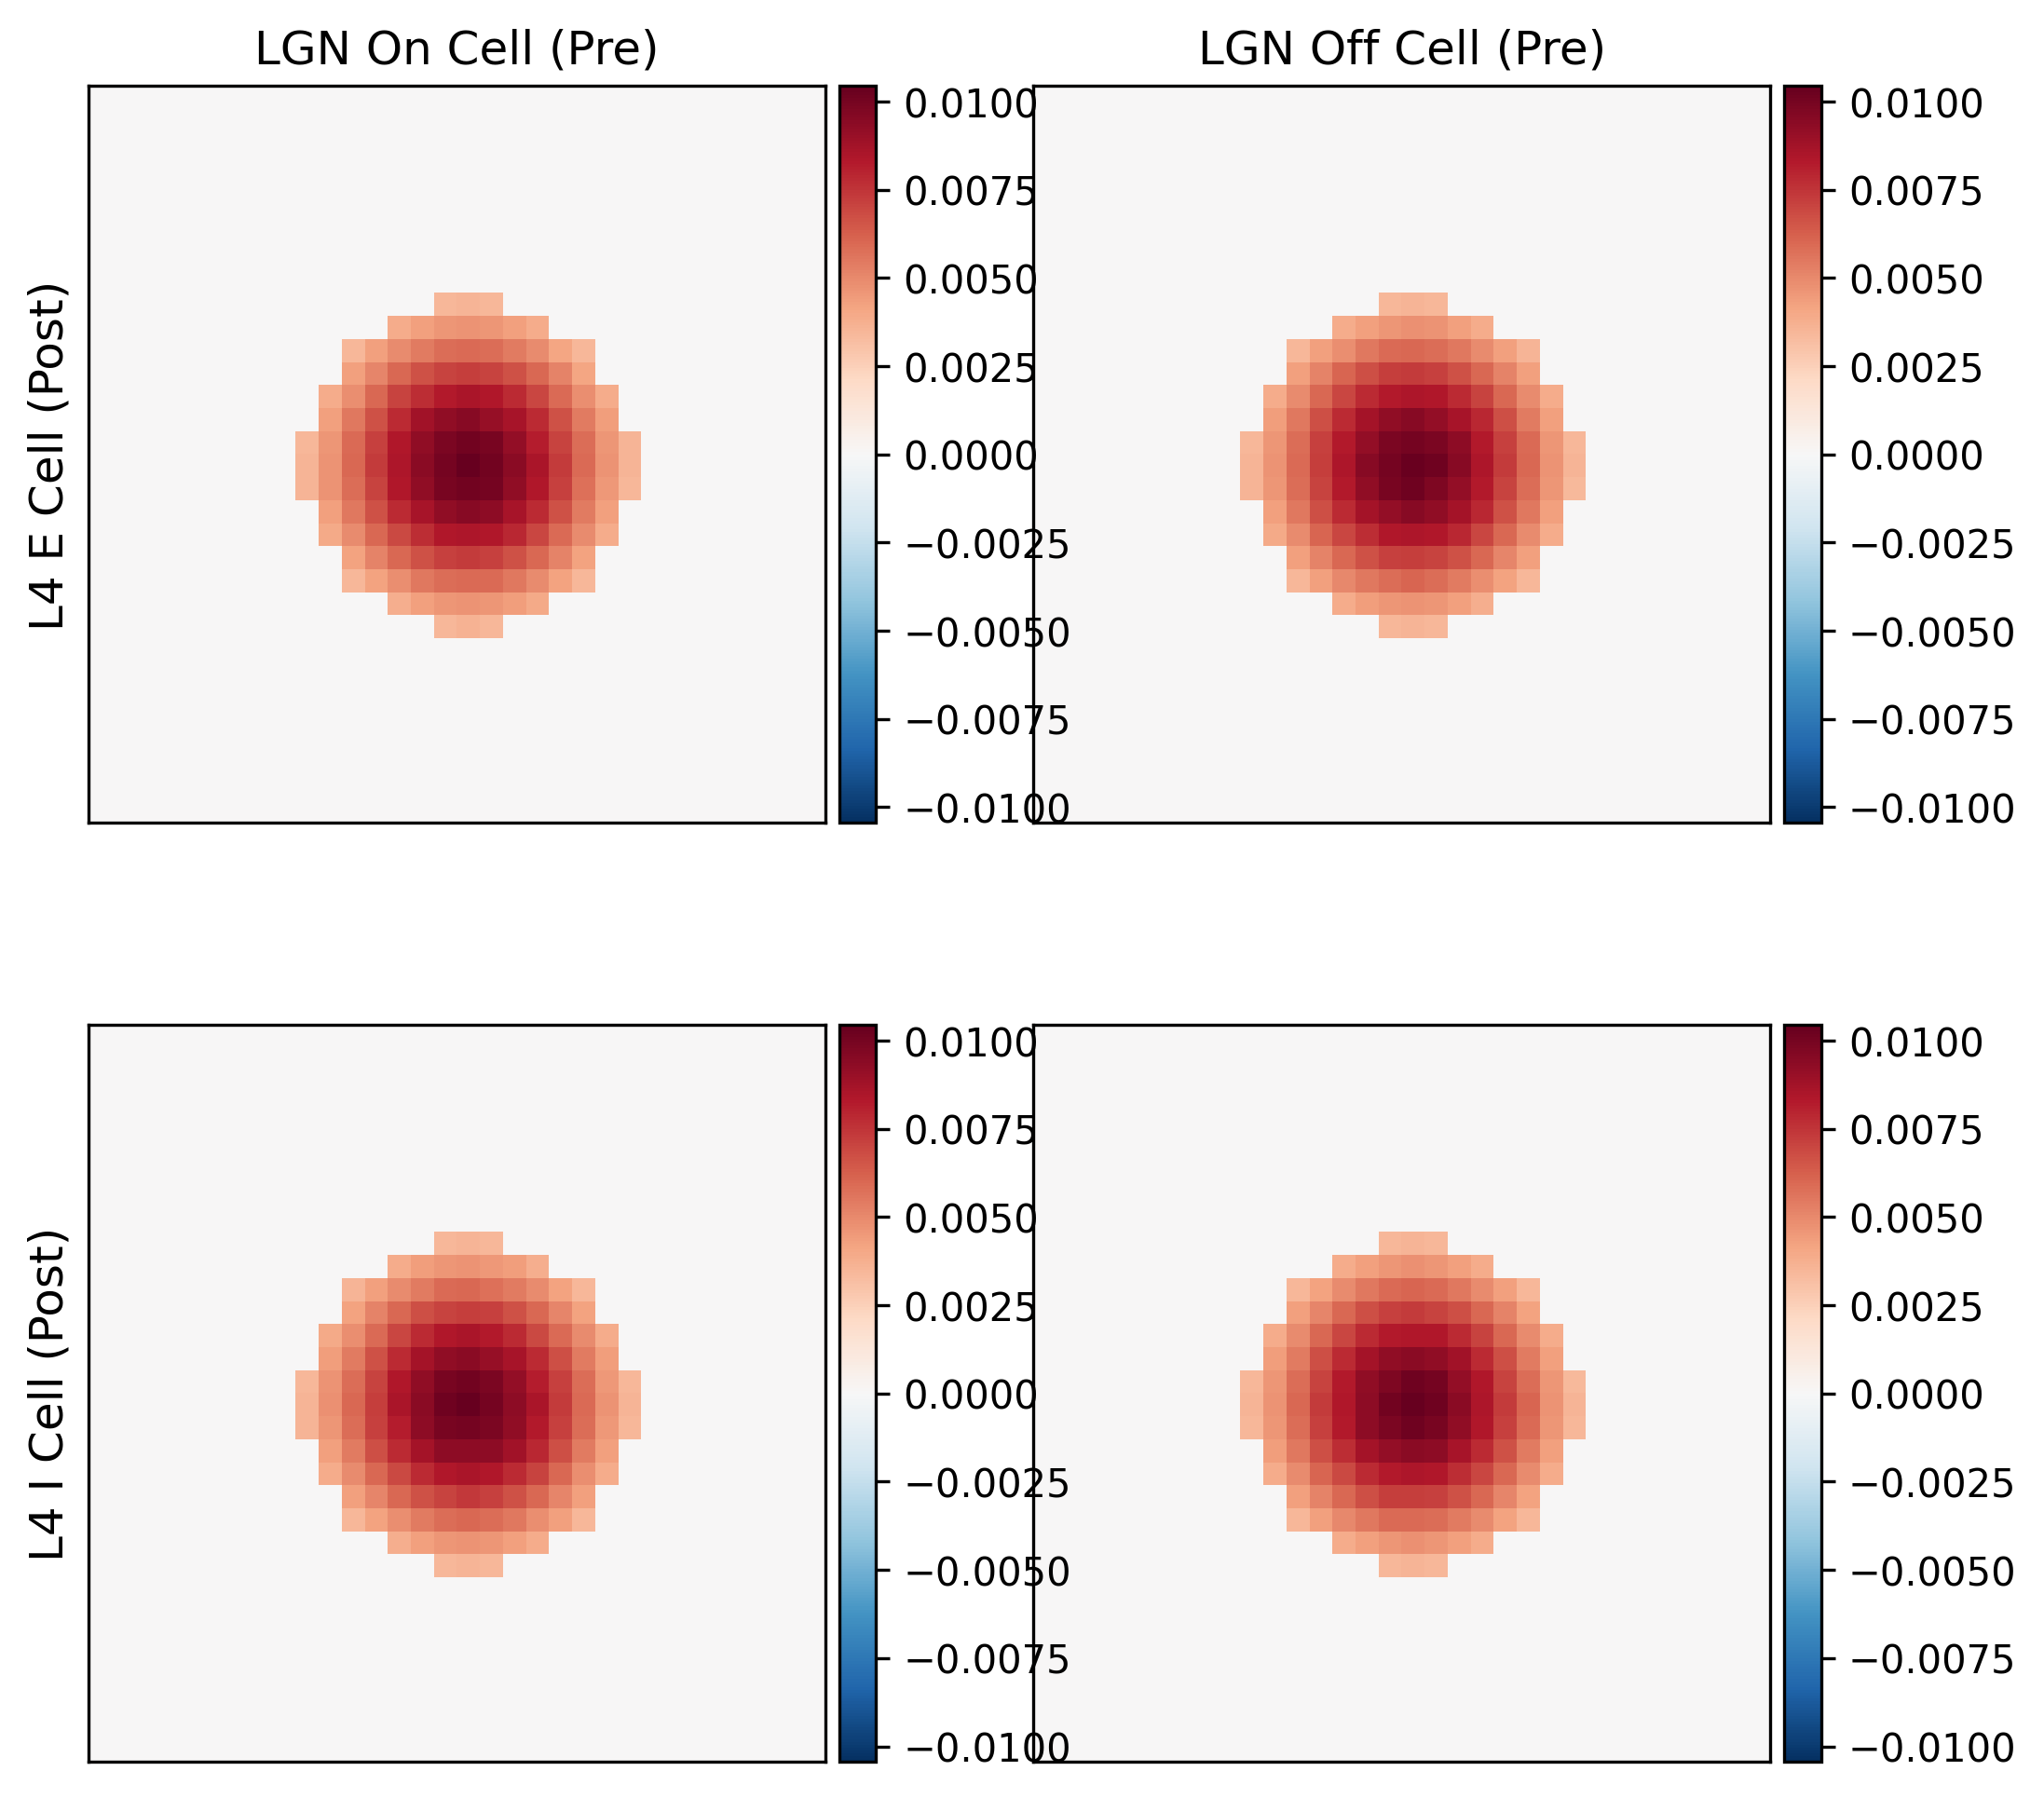

In [12]:
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

pf.imshowbar(fig,axs[0,0],Wlgnto4[0].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[0,1],Wlgnto4[1].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,0],Wlgnto4[2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,1],Wlgnto4[3].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
axs[0,0].set_ylabel('L4 E Cell (Post)',fontsize=12)
axs[1,0].set_ylabel('L4 I Cell (Post)',fontsize=12)
axs[0,0].set_title('LGN On Cell (Pre)',fontsize=12)
axs[0,1].set_title('LGN Off Cell (Pre)',fontsize=12)

3.5520008
-3.116006
3.5520008
-3.116006


Text(0.5, 1.0, 'L4 I Cell (Pre)')

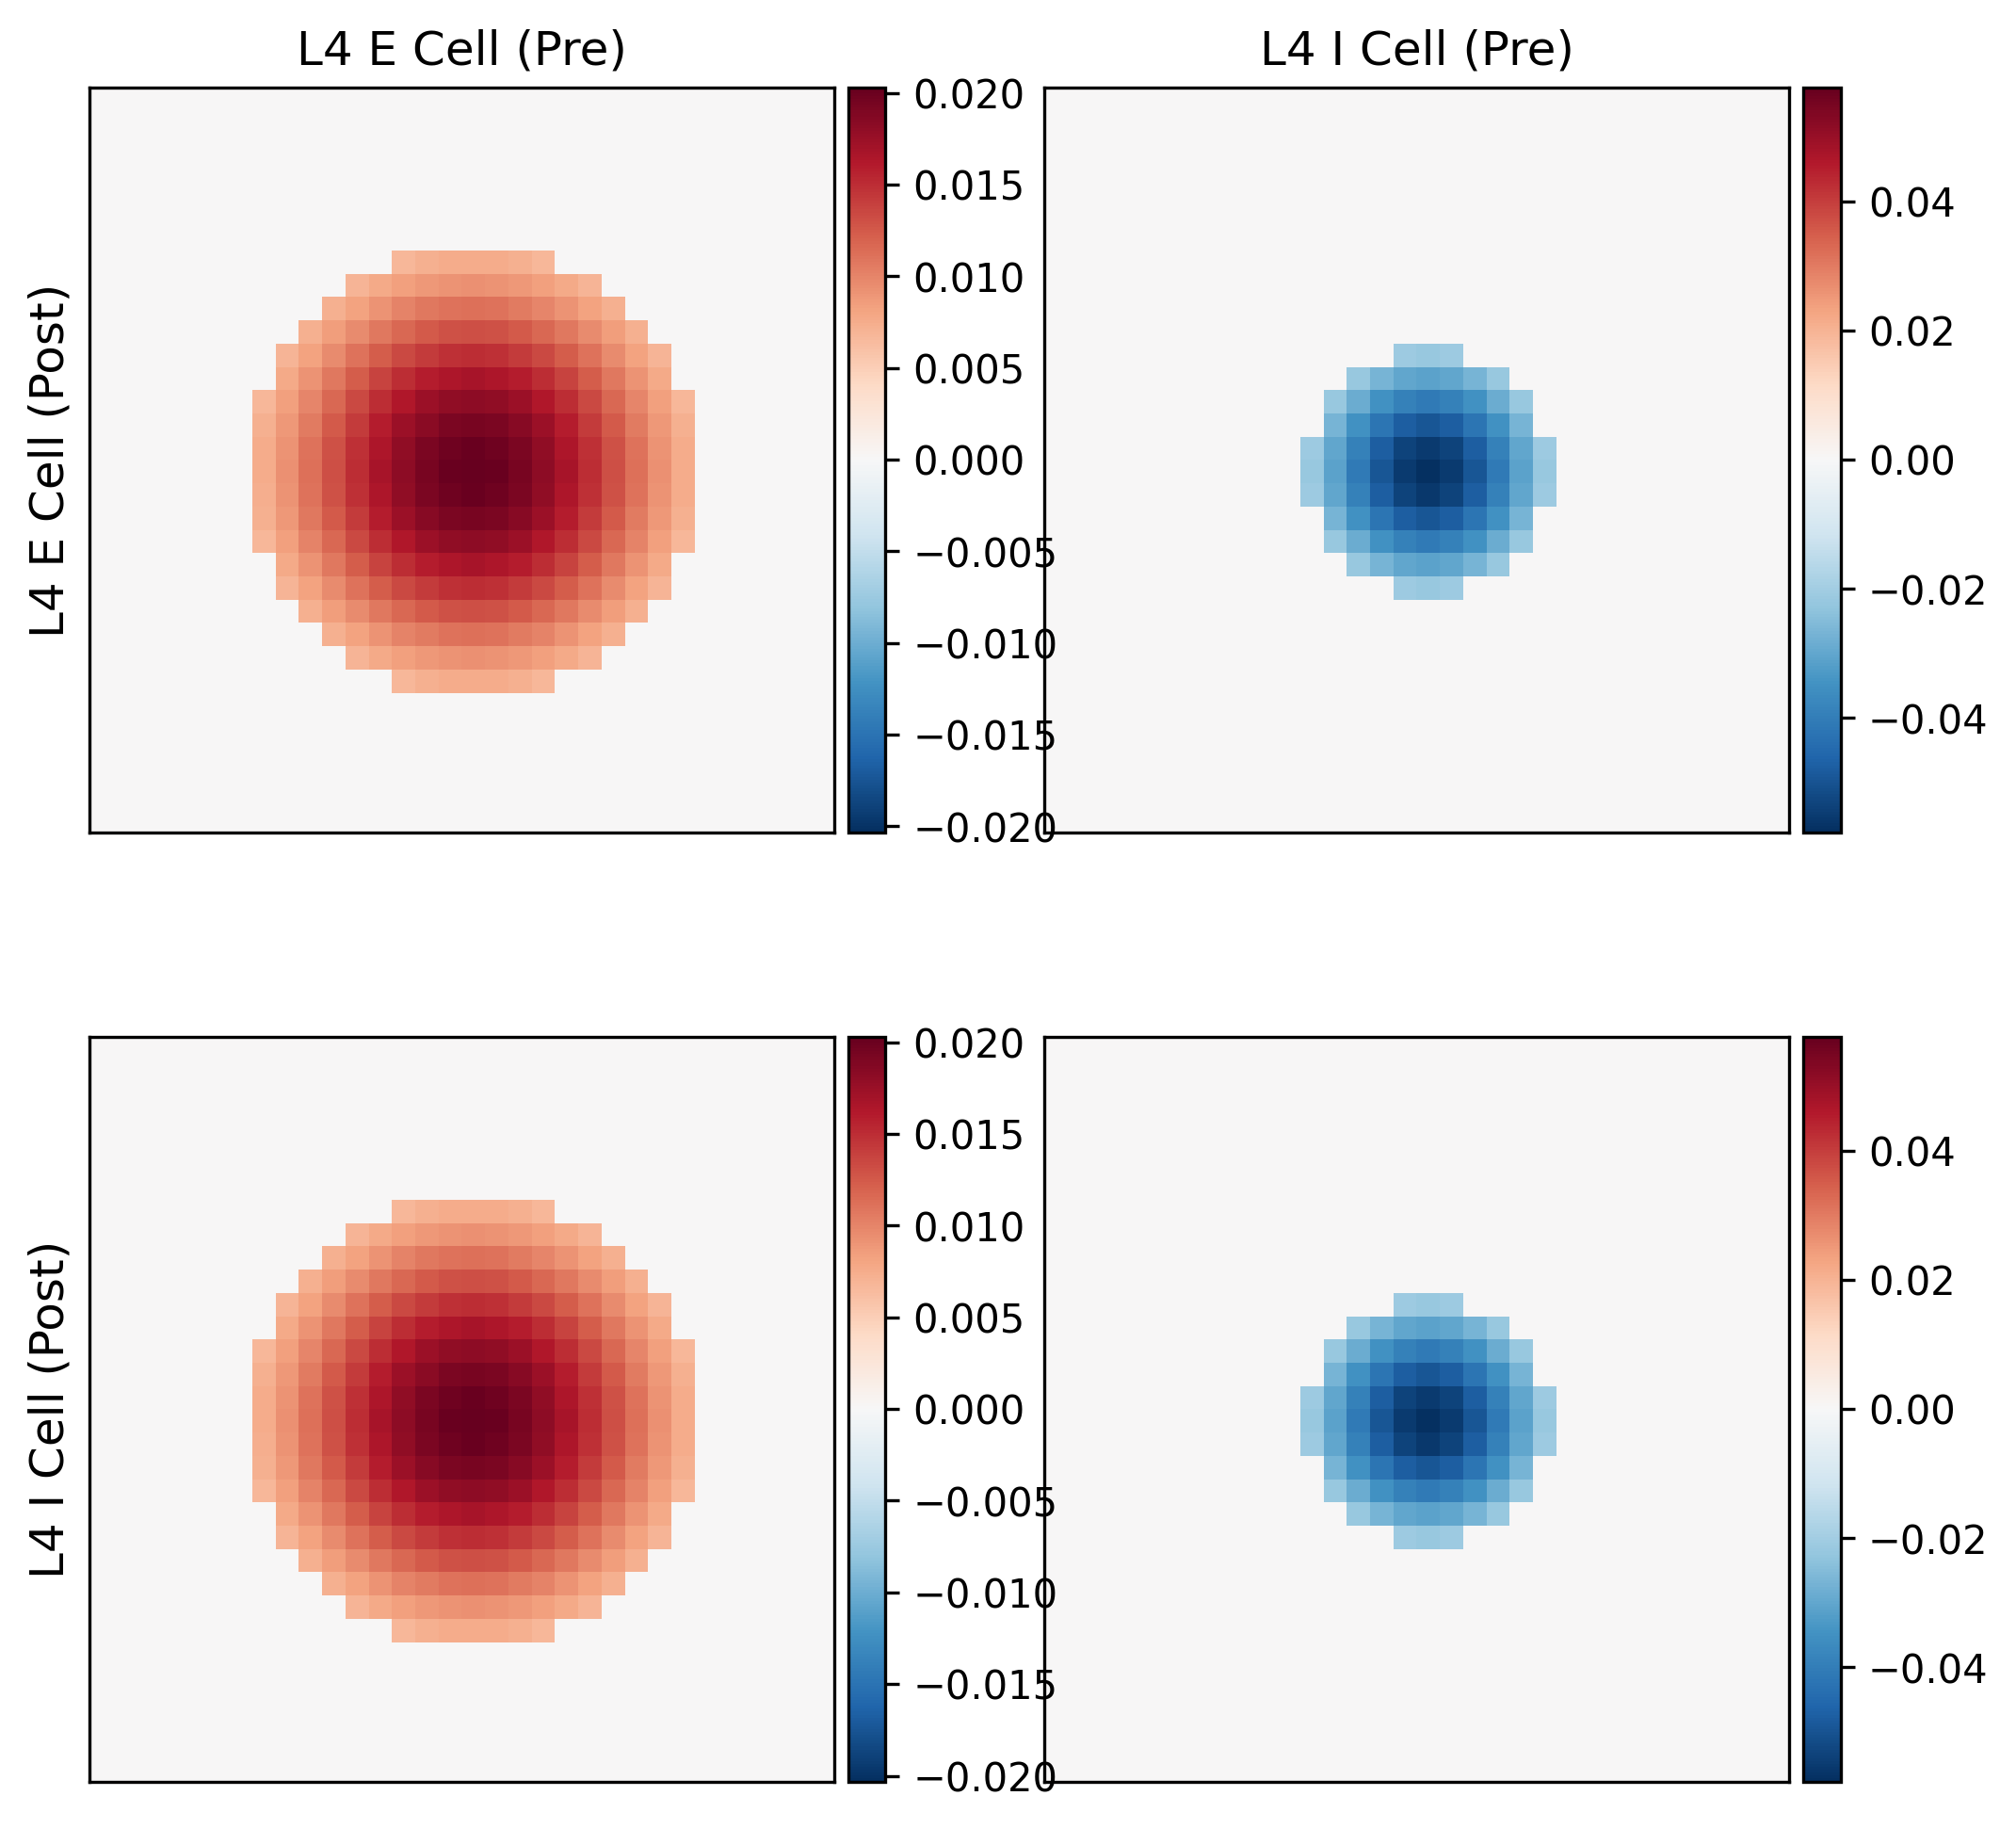

In [13]:
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

pf.imshowbar(fig,axs[0,0],W4to4[:N4**2,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[:N4**2,:N4**2])),vmax=np.max(np.abs(W4to4[:N4**2,:N4**2])),cmap='RdBu_r')
pf.imshowbar(fig,axs[0,1],W4to4[:N4**2,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[:N4**2,N4**2:])),vmax=np.max(np.abs(W4to4[:N4**2,N4**2:])),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,0],W4to4[N4**2:,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[N4**2:,:N4**2])),vmax=np.max(np.abs(W4to4[N4**2:,:N4**2])),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,1],W4to4[N4**2:,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[N4**2:,N4**2:])),vmax=np.max(np.abs(W4to4[N4**2:,N4**2:])),cmap='RdBu_r')
print(np.sum(W4to4[:N4**2,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[:N4**2,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[N4**2:,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[N4**2:,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
axs[0,0].set_ylabel('L4 E Cell (Post)',fontsize=12)
axs[1,0].set_ylabel('L4 I Cell (Post)',fontsize=12)
axs[0,0].set_title('L4 E Cell (Pre)',fontsize=12)
axs[0,1].set_title('L4 I Cell (Pre)',fontsize=12)

# Test Initial Weights and Arbors

In [92]:
reload(misc)

config_name = "ffrec_test1"

config_dict,N4pop,Nlgnpop,Nret,Nlgn,N4 = get_network_size(config_name)

MISC params_dict params_ffrec_test1 {'Nret': 32, 'Nlgn': 32, 'N4': 32, 'N23': 1, 'Nvert': 1, 'runtime': 500, 'dt': 0.05, 'tau': 1.0, 'num_lgn_paths': 4, 'gamma_lgn': 4.0, 'gamma_4': 1.0, 'gamma_23': 1.0, 'learning_rate_decay_const': 160000.0, 'saving_stepsize': 10, 'plasticity_rule': 'activity_based', 'random_seed': 19, 'nonlinearity_l4': 'rectifier', 'nonlinearity_l23': 'rectifier', 'integrator': 'Euler', 'test_lowDsubset': False, 'developing_params': [], 'q_dict': True, 'Inp_params': {'ndim': 25, 'radius': 3.0, 'width': 1.0, 'simulate_activity': 'dynamics', 'pattern_duration': 2500, 'avg_no_inp': 1, 'expanse_time': 1, 'init_radius': 0.3, 'mean_width': 0.3, 'onoff_corr_factor': 1.0, 'onoff_rel_weight': 1.0, 'input_type': 'white_noise_online', 'off_bias_strength': 0.0, 'off_bias_region_size': 0.5}, 'Wret_to_lgn_params': {'sigma1': 0.0225, 'sigma2': 0.06, 'ampl1': 2.0, 'ampl2': 1.0, 'gamma_ret': 1.0, 'noise': 0.0, 'sigma': 0.03375, 'ampl': 1.0, 'profile': 'Gaussian', 'mean_eccentricity'

In [100]:
reload(network)
_,Wlgnto4,arbor_on,arbor_off,arbor2,_,W4to4,arbor4to4,init_weights4to4 = get_network_system(-1,config_name)

(4, 1024, 1024)


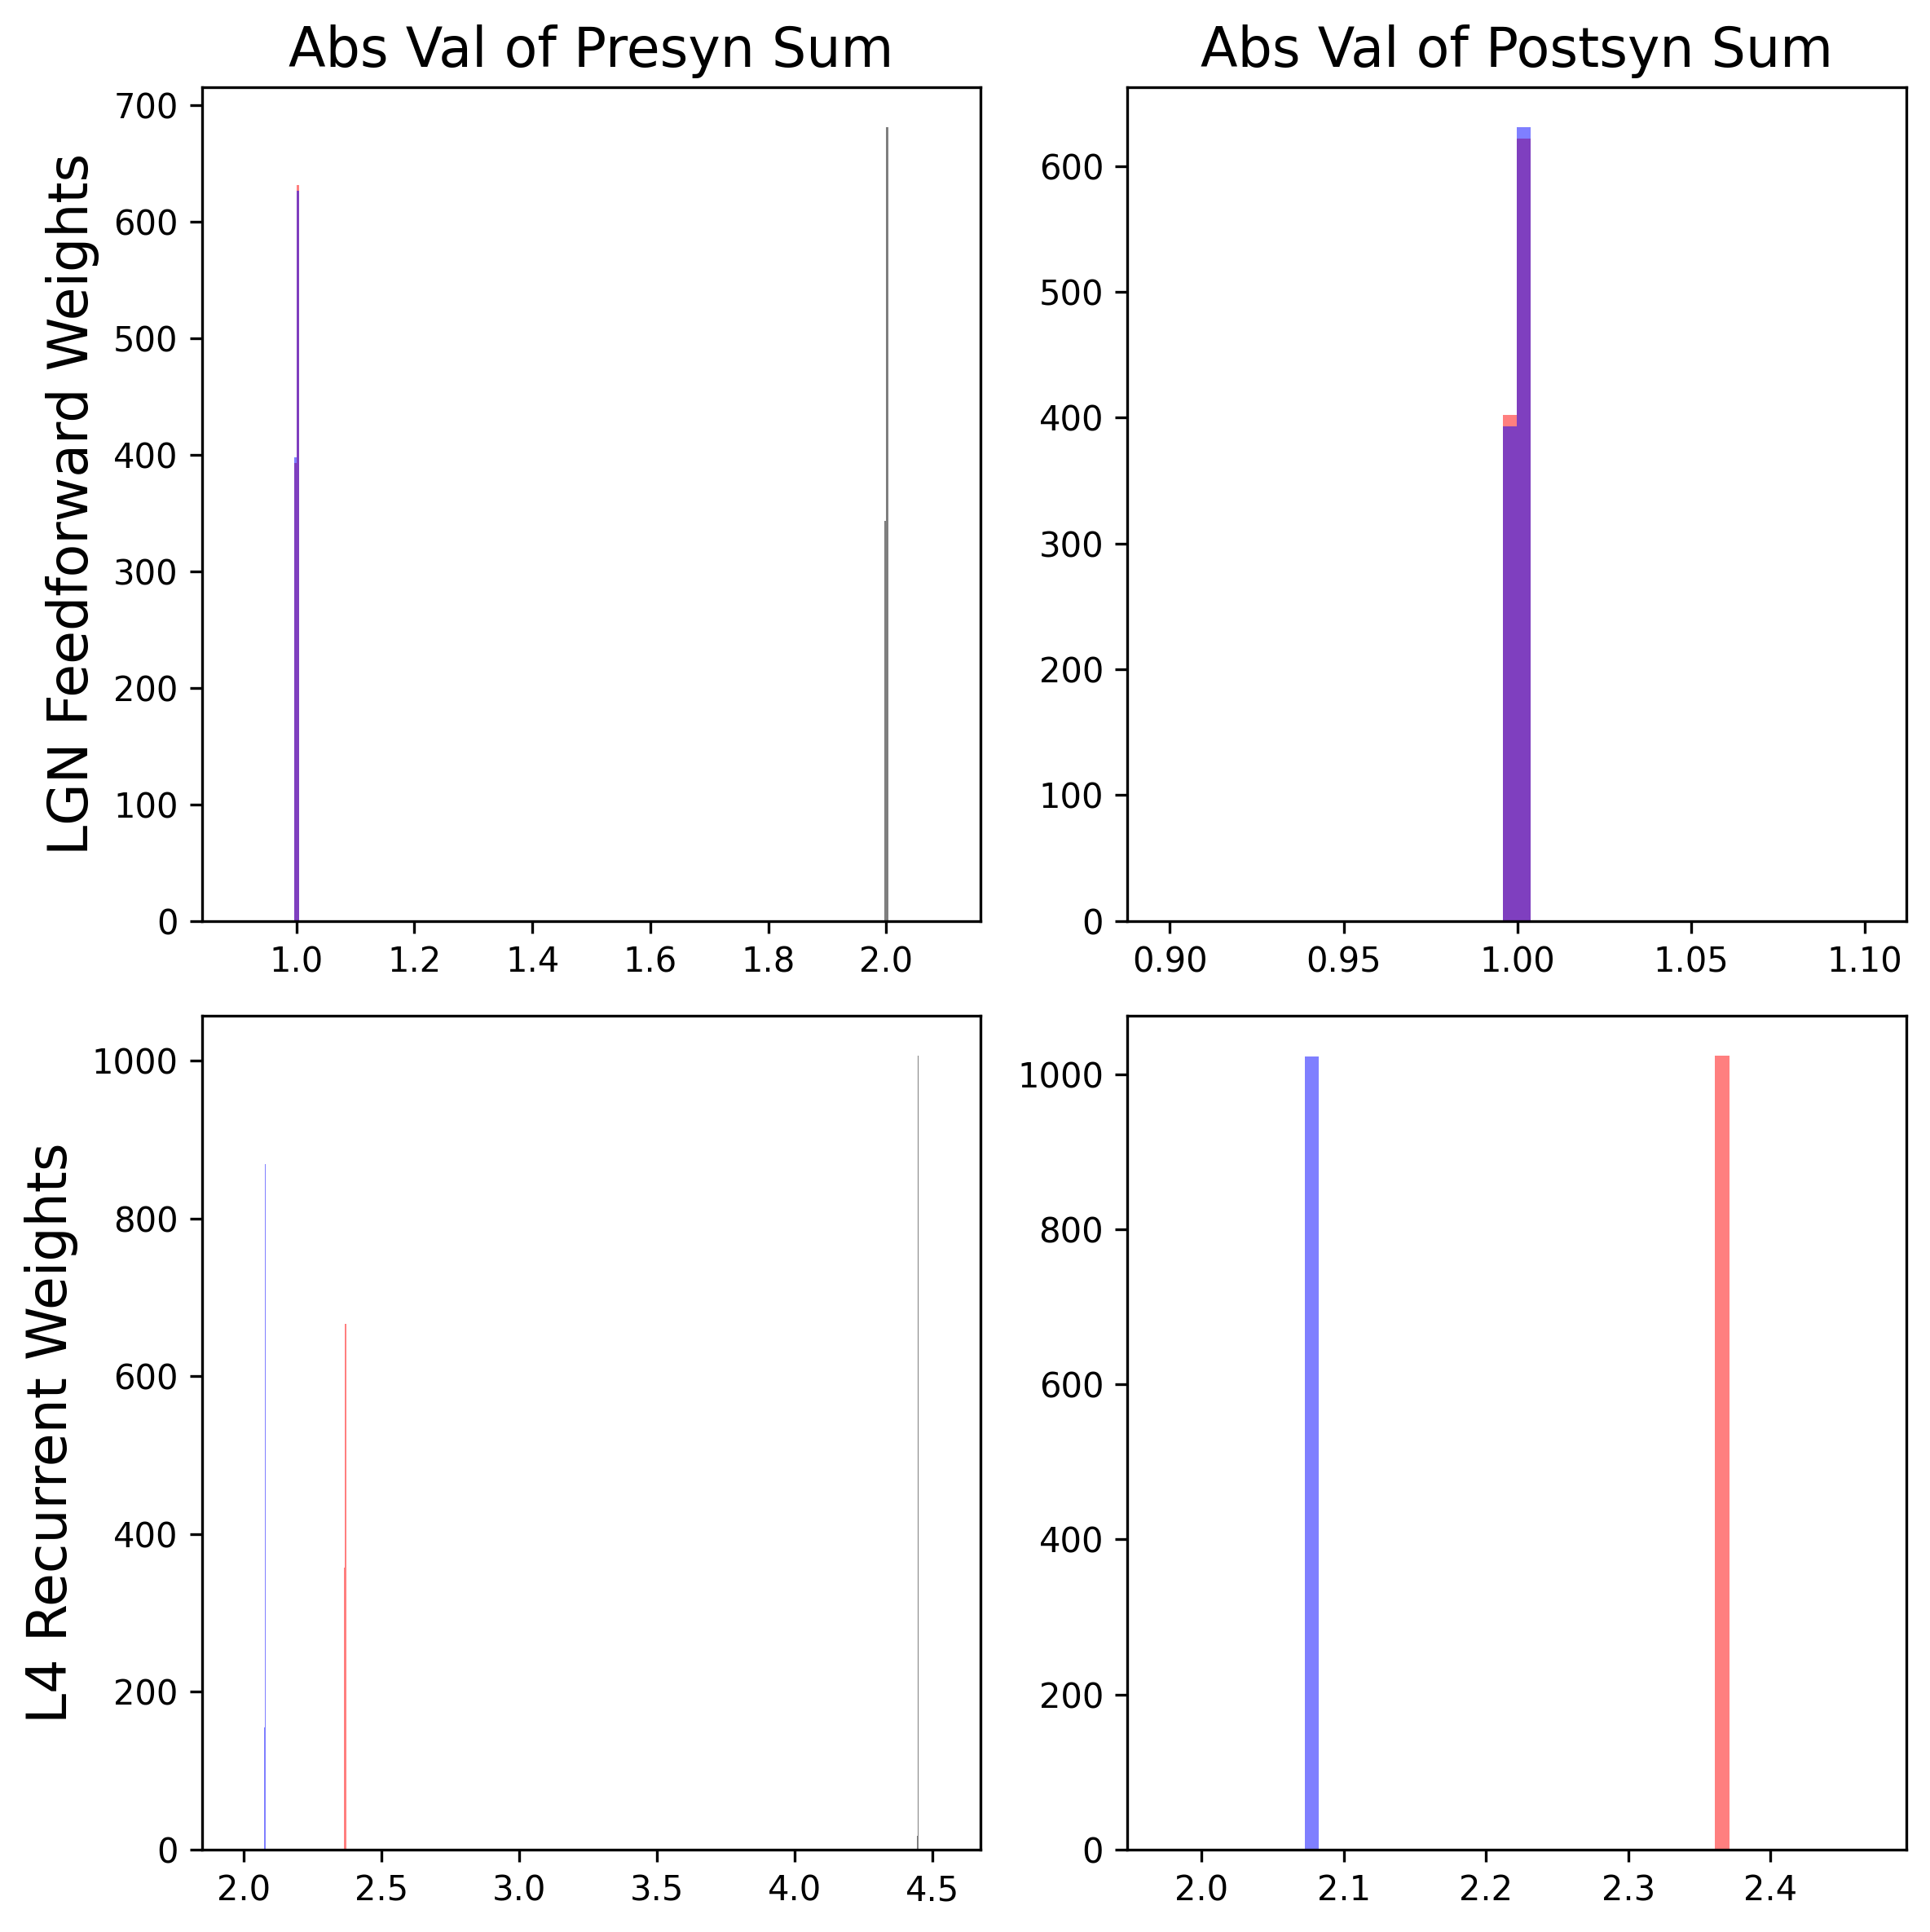

In [95]:
print(Wlgnto4.shape)
Wlgnto4.reshape(N4pop,Nlgnpop,N4*N4,Nlgn*Nlgn)
                
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

Wpresum = Wlgnto4.reshape(N4pop,Nlgnpop,N4**2,Nlgn**2).sum((3))
Wpstsum = Wlgnto4.reshape(N4pop,Nlgnpop,N4**2,Nlgn**2).sum((2))
for i in range(2):
    axs[0,0].hist(Wpresum[0,i],
                  bins=np.linspace(np.min(Wpresum[0,i])-0.1,np.max(Wpresum[0,i])+0.1,51),
                  density=False,color=['r','b'][i],alpha=0.5)
    axs[0,1].hist(Wpstsum[0,i],
                  bins=np.linspace(np.min(Wpstsum)-0.1,np.max(Wpstsum)+0.1,51),
                  density=False,color=['r','b'][i],alpha=0.5)
axs[0,0].hist(Wpresum[0].sum(0),
              bins=np.linspace(np.min(Wpresum[0].sum(0))-0.1,np.max(Wpresum[0].sum(0))+0.1,51),
              density=False,color='k',alpha=0.5)

Wpresum = np.abs(W4to4.reshape(N4pop,N4**2,N4pop,N4**2).transpose((0,2,1,3)).sum((3)))
Wpstsum = np.abs(W4to4.reshape(N4pop,N4**2,N4pop,N4**2).transpose((0,2,1,3)).sum((2)))
for i in range(2):
    axs[1,0].hist(Wpresum[0,i],
                  bins=np.linspace(np.min(Wpresum[0,i])-0.1,np.max(Wpresum[0,i])+0.1,51),
                  density=False,color=['r','b'][i],alpha=0.5)
    axs[1,1].hist(Wpstsum[0,i],
                  bins=np.linspace(np.min(Wpstsum)-0.1,np.max(Wpstsum)+0.1,51),
                  density=False,color=['r','b'][i],alpha=0.5)
axs[1,0].hist(Wpresum[0].sum(0),
              bins=np.linspace(np.min(Wpresum[0].sum(0))-0.1,np.max(Wpresum[0].sum(0))+0.1,51),
              density=False,color='k',alpha=0.5)

axs[0,0].set_ylabel('LGN Feedforward Weights',fontsize=16)
axs[1,0].set_ylabel('L4 Recurrent Weights',fontsize=16)
axs[0,0].set_title('Abs Val of Presyn Sum',fontsize=16)
axs[0,1].set_title('Abs Val of Postsyn Sum',fontsize=16)

# fig.suptitle(r'Sum of Incoming and Outgoing Connections')
fig.tight_layout()

Text(0.5, 1.0, 'LGN Off Cell (Pre)')

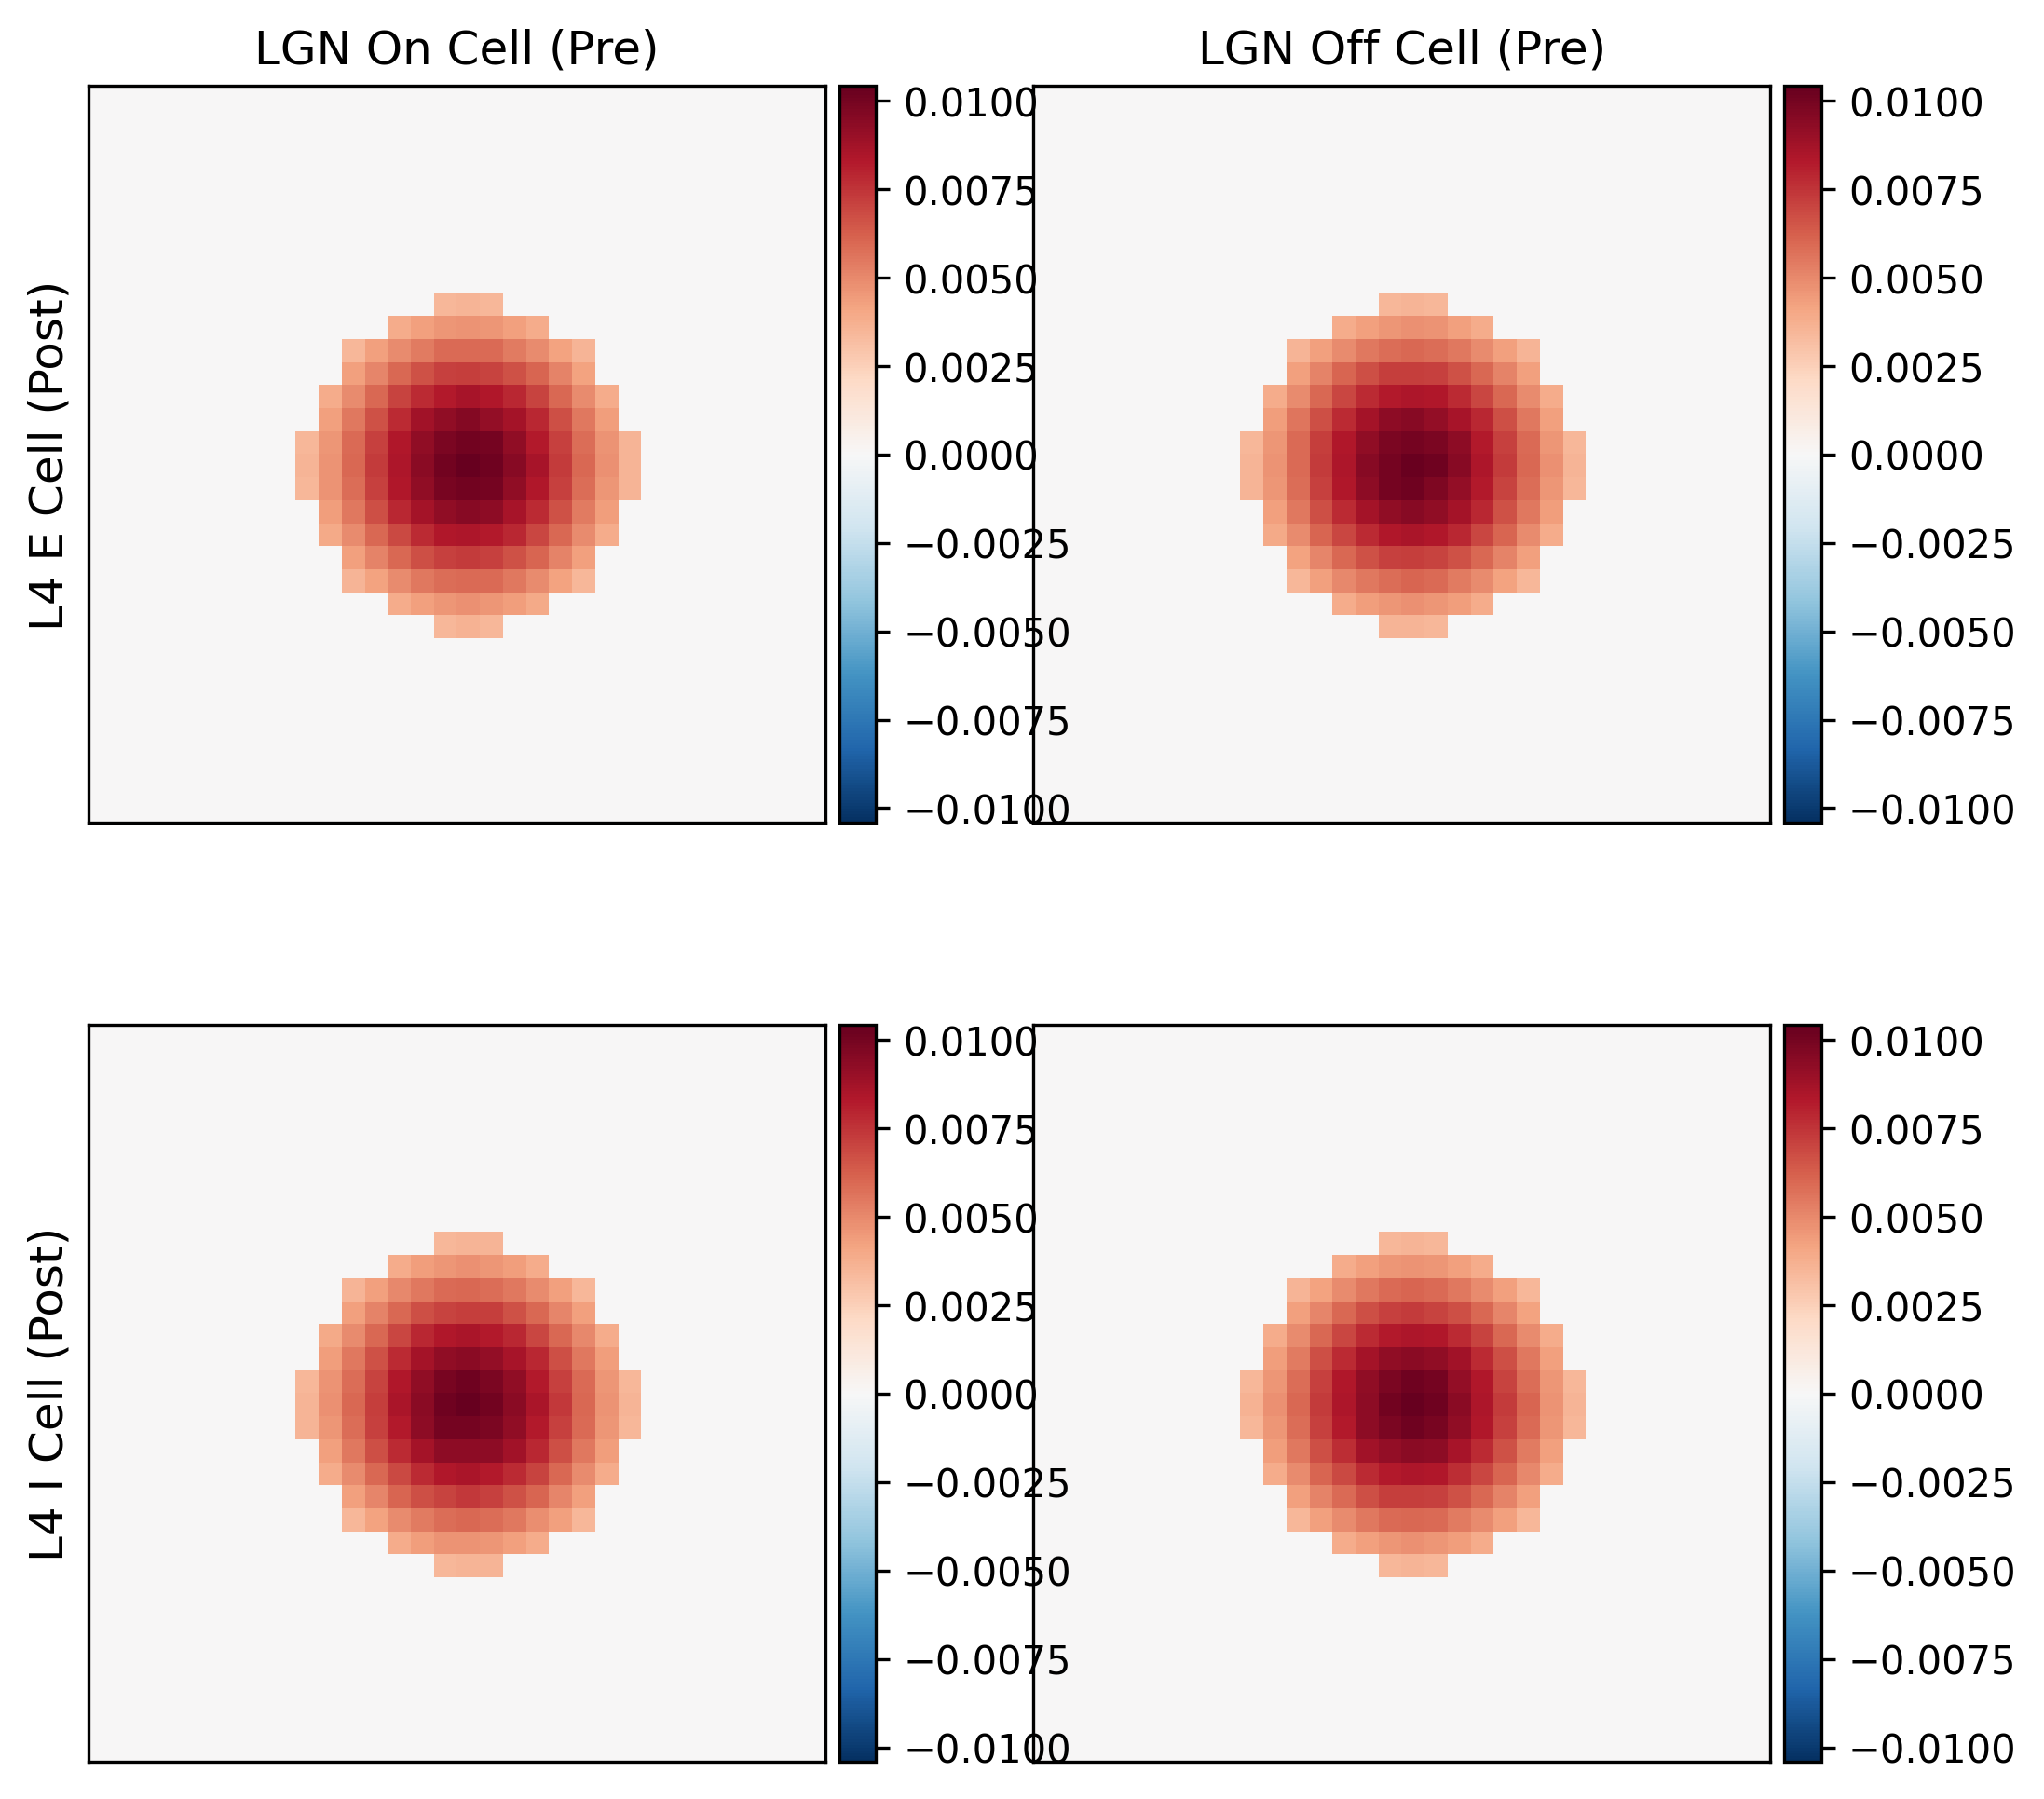

In [57]:
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

pf.imshowbar(fig,axs[0,0],Wlgnto4[0].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[0,1],Wlgnto4[1].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,0],Wlgnto4[2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,1],Wlgnto4[3].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(Wlgnto4)),vmax=np.max(np.abs(Wlgnto4)),cmap='RdBu_r')
axs[0,0].set_ylabel('L4 E Cell (Post)',fontsize=12)
axs[1,0].set_ylabel('L4 I Cell (Post)',fontsize=12)
axs[0,0].set_title('LGN On Cell (Pre)',fontsize=12)
axs[0,1].set_title('LGN Off Cell (Pre)',fontsize=12)

Text(0.5, 1.0, 'LGN Off Cell (Pre)')

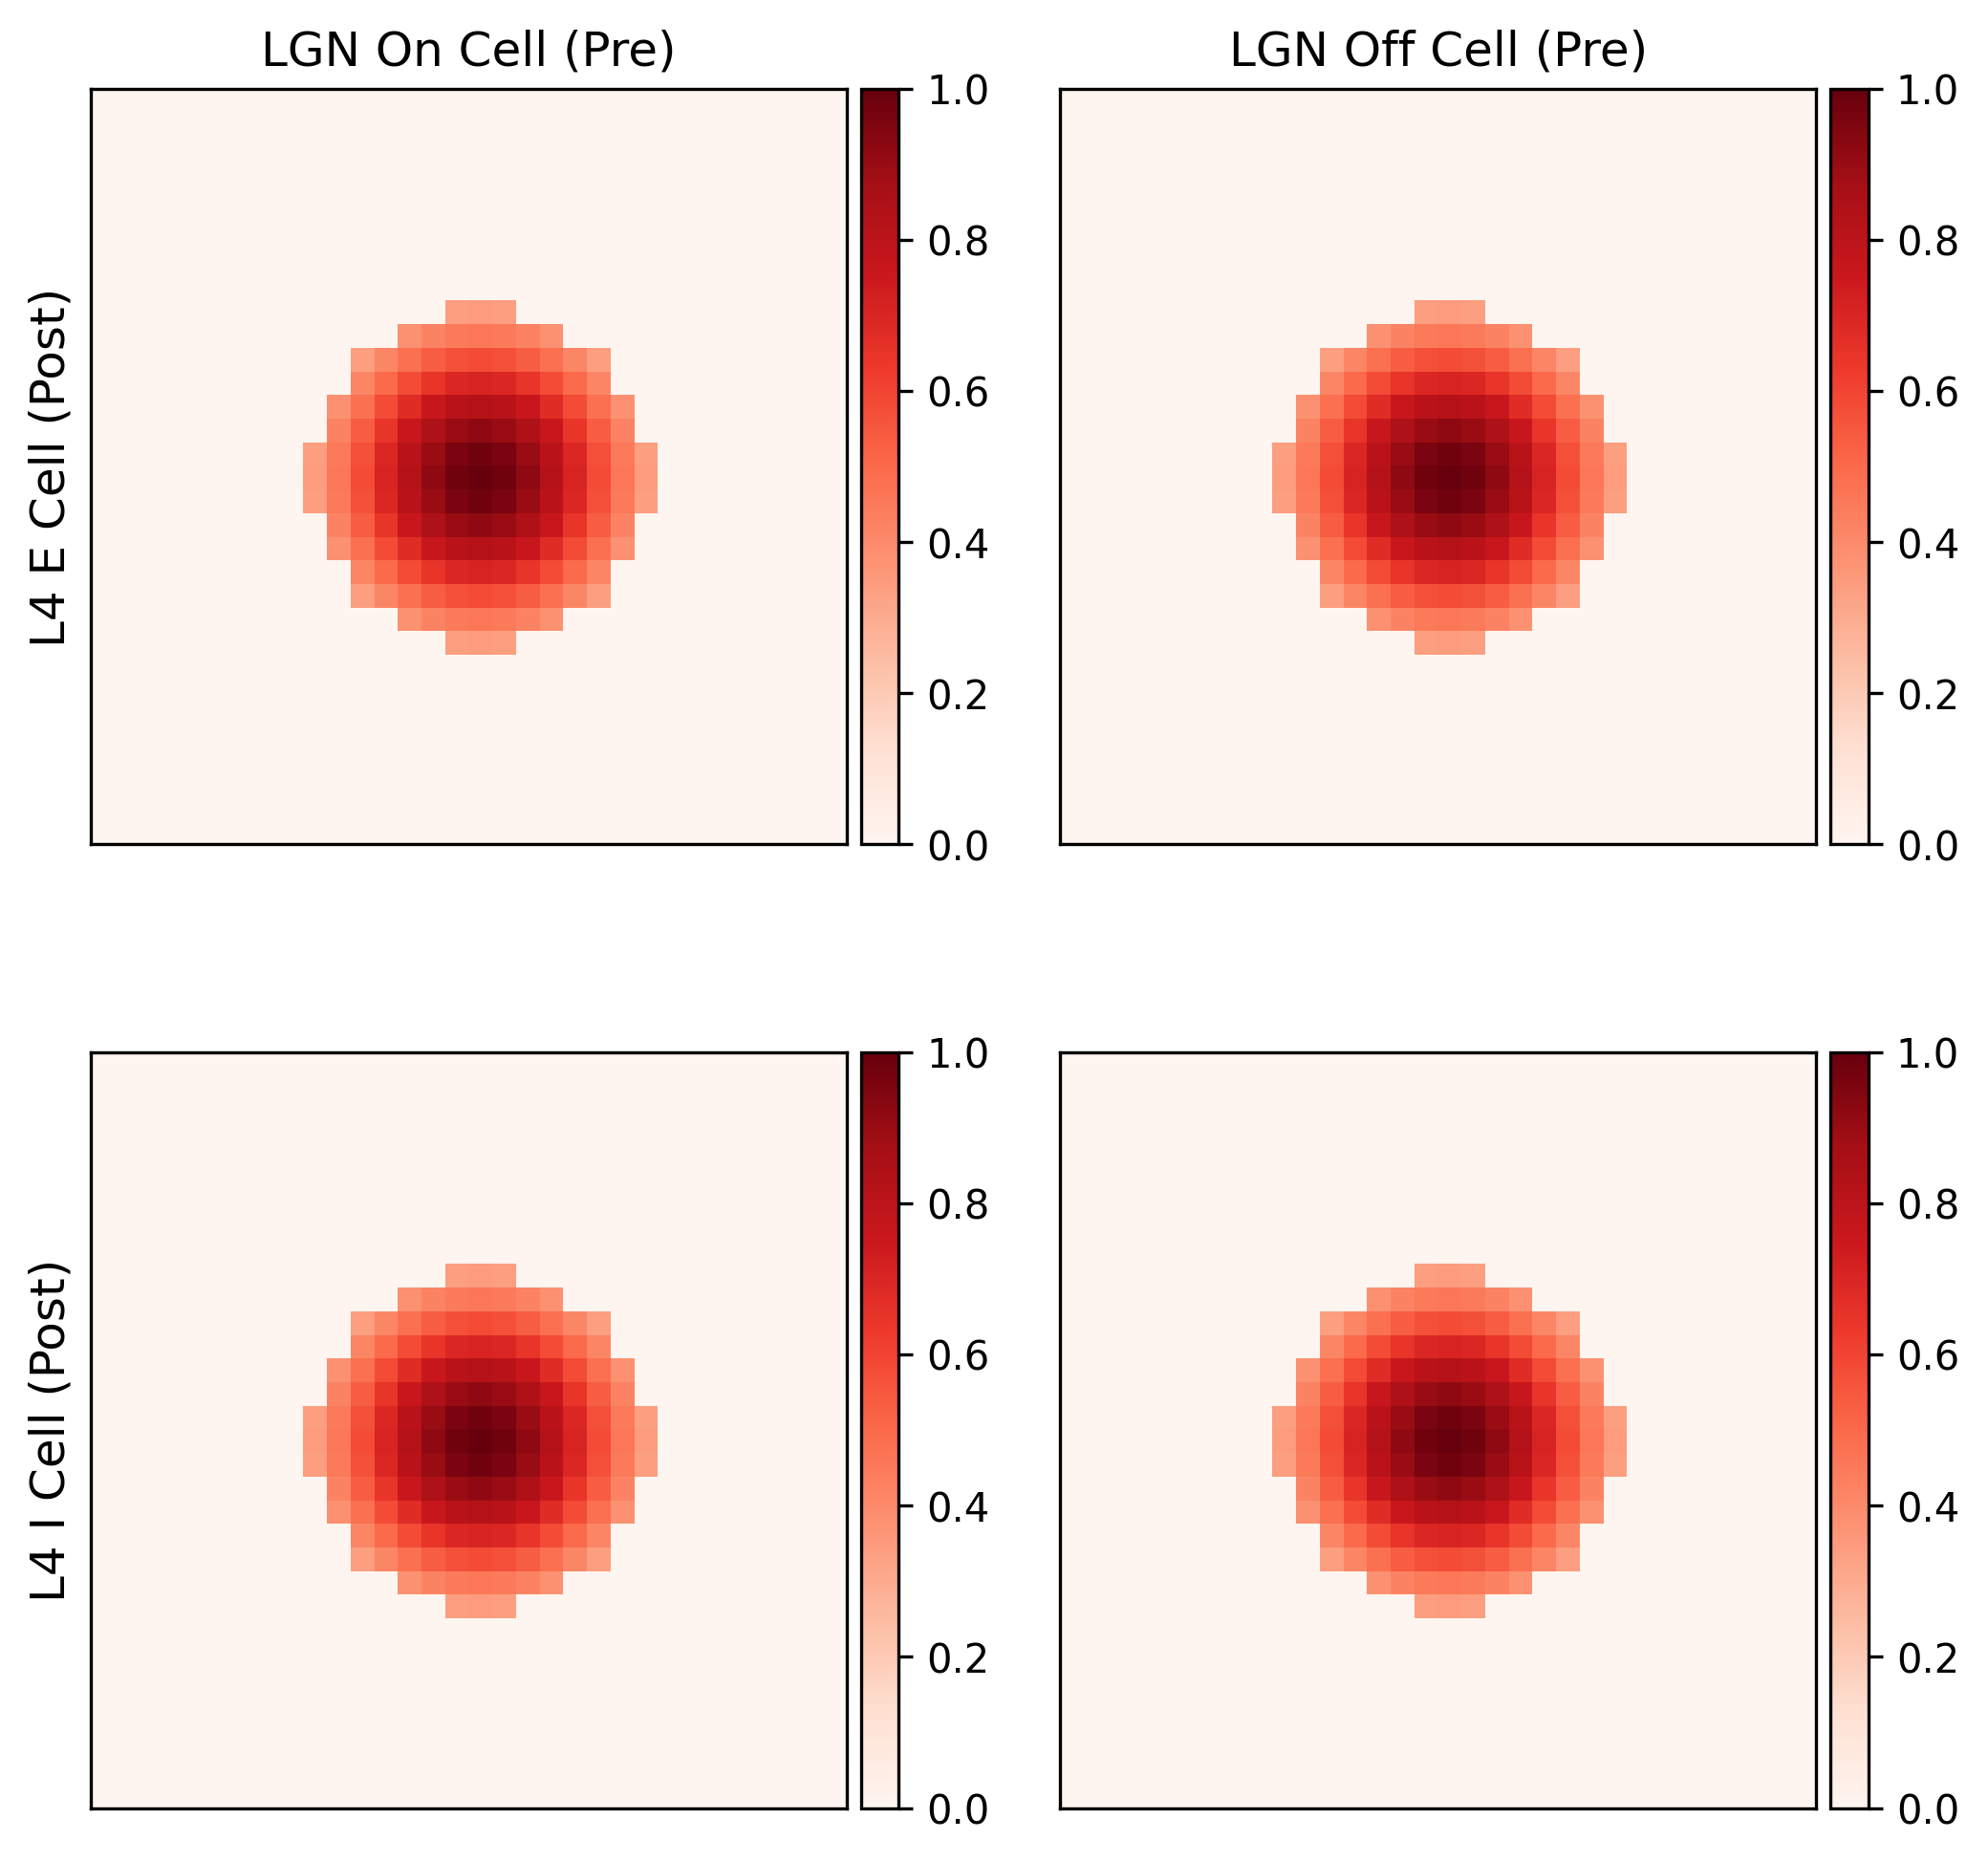

In [58]:
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

pf.imshowbar(fig,axs[0,0],arbor2[0].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor2)),cmap='Reds')
pf.imshowbar(fig,axs[0,1],arbor2[1].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor2)),cmap='Reds')
pf.imshowbar(fig,axs[1,0],arbor2[2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor2)),cmap='Reds')
pf.imshowbar(fig,axs[1,1],arbor2[3].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor2)),cmap='Reds')
axs[0,0].set_ylabel('L4 E Cell (Post)',fontsize=12)
axs[1,0].set_ylabel('L4 I Cell (Post)',fontsize=12)
axs[0,0].set_title('LGN On Cell (Pre)',fontsize=12)
axs[0,1].set_title('LGN Off Cell (Pre)',fontsize=12)

2.3679999999999994
-2.0773
2.3680000000000003
-2.0772999999999997


Text(0.5, 1.0, 'L4 I Cell (Pre)')

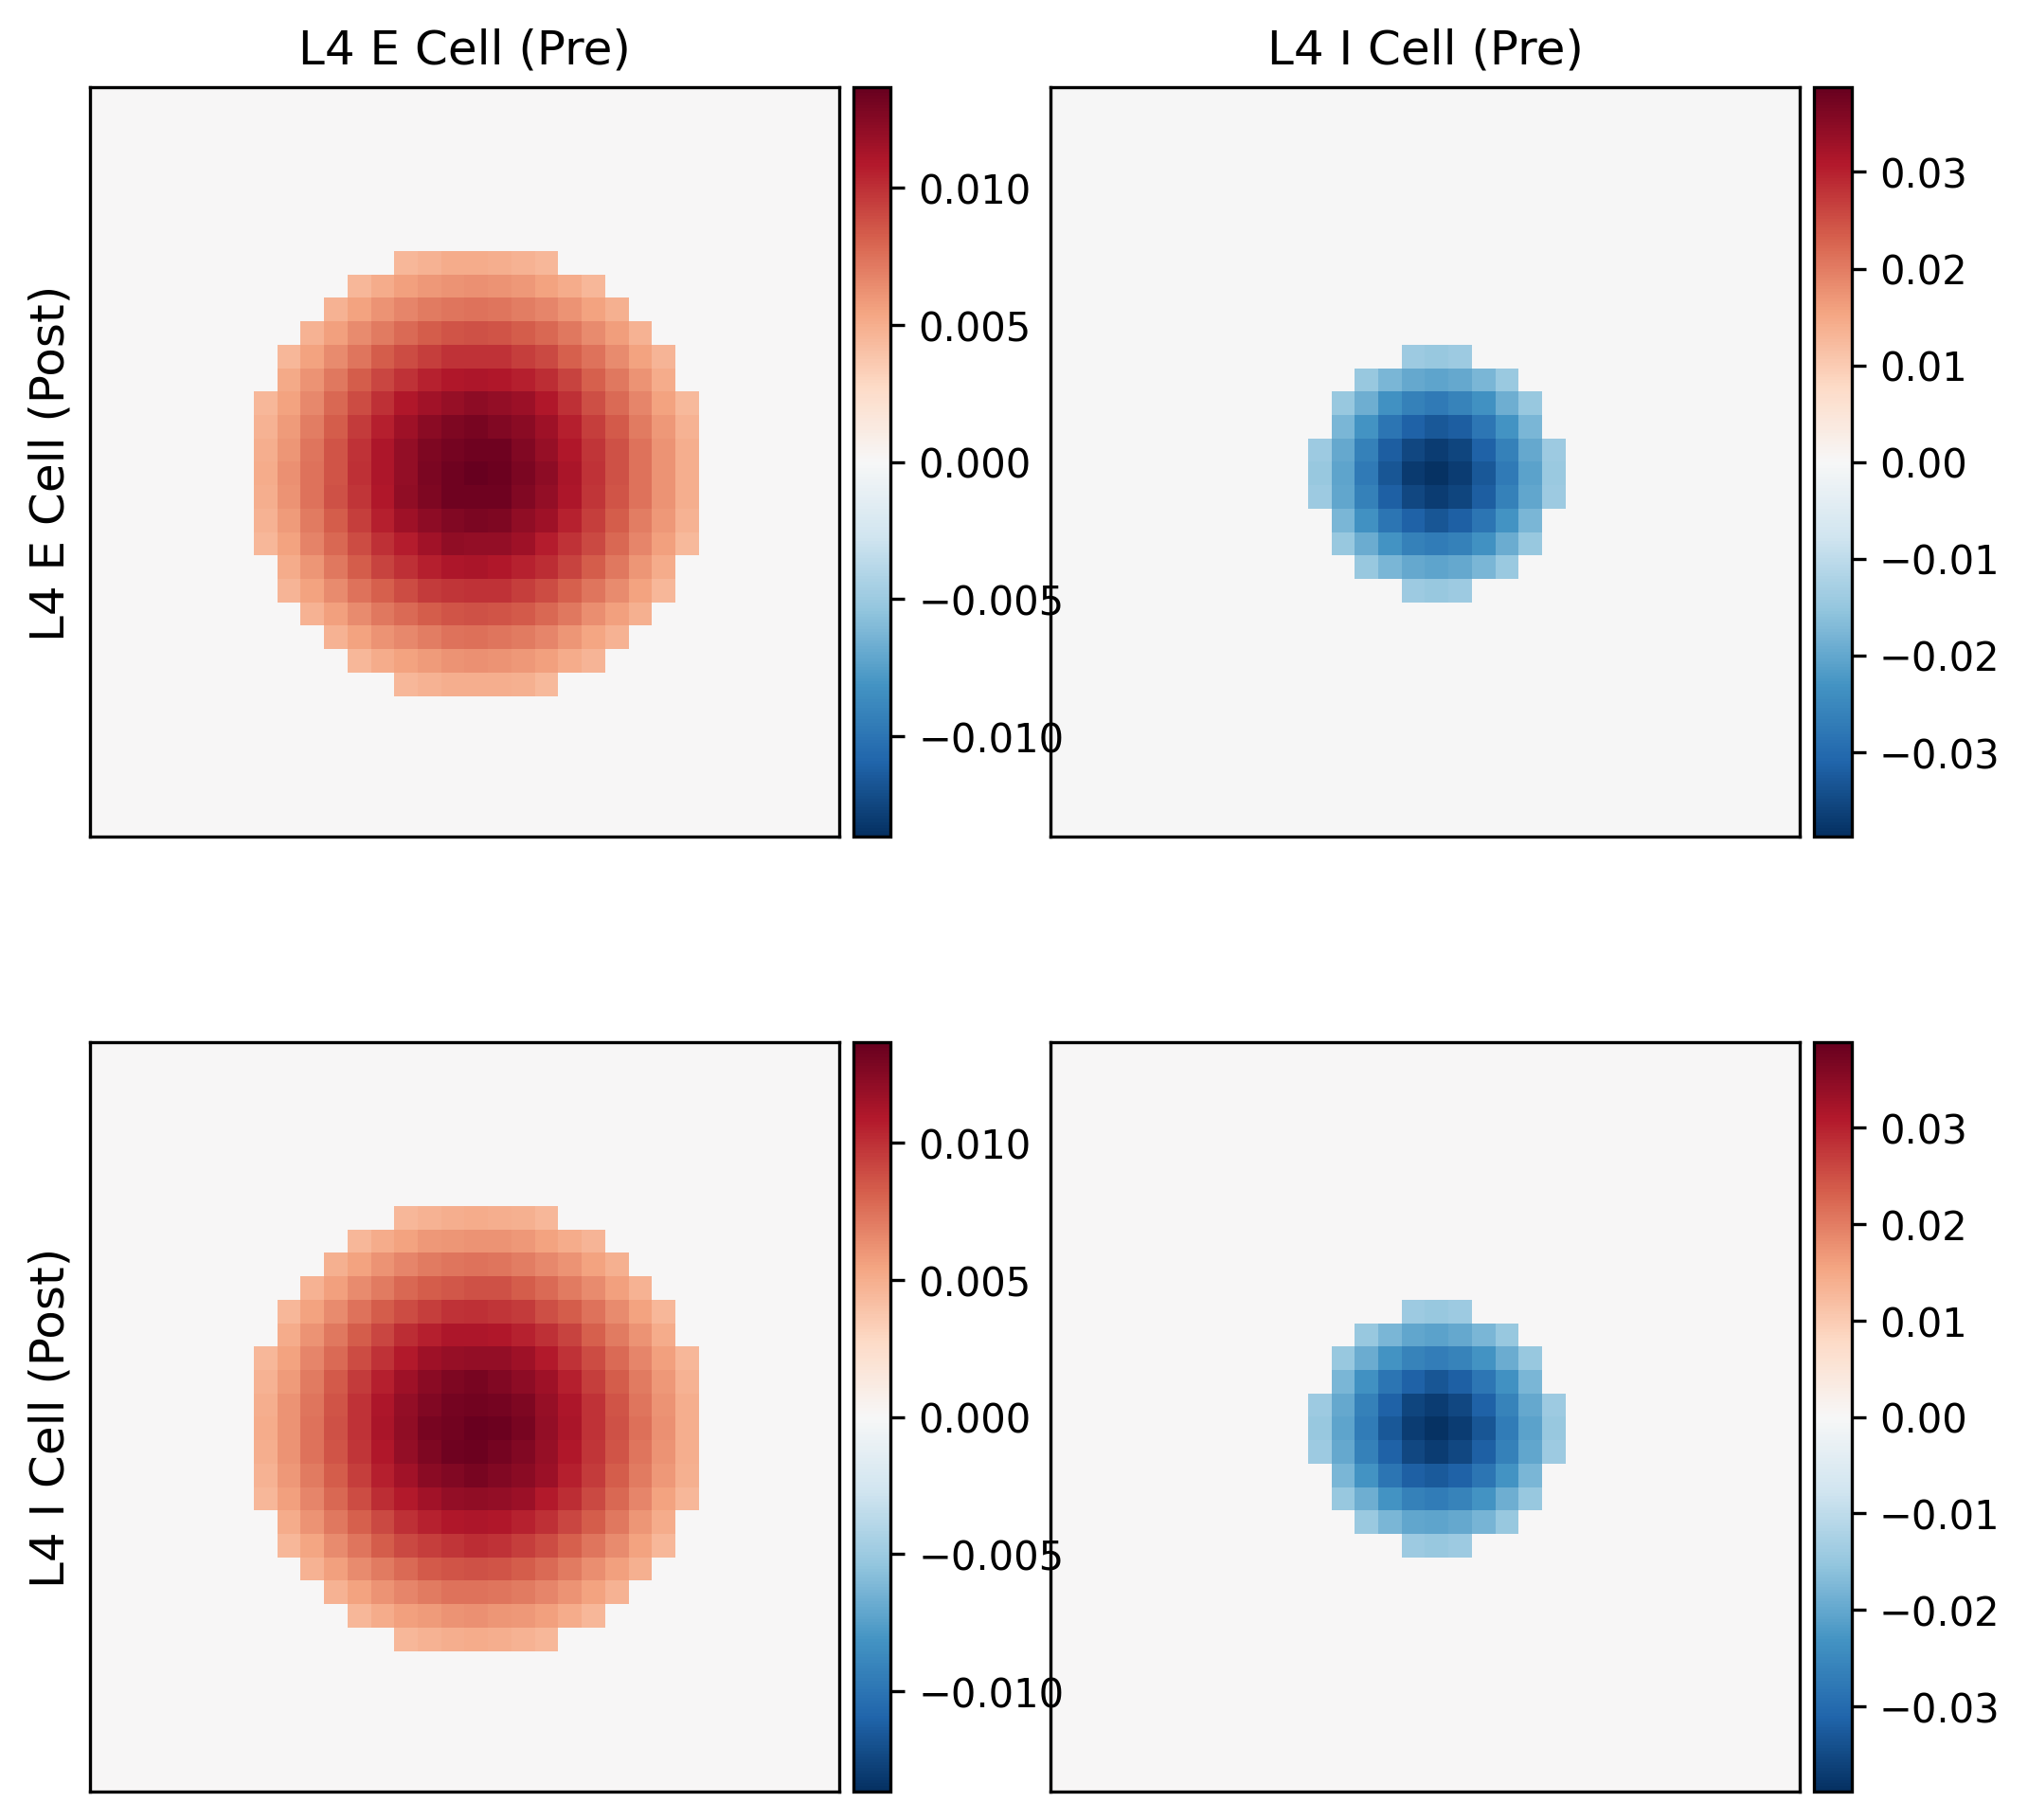

In [59]:
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

pf.imshowbar(fig,axs[0,0],W4to4[:N4**2,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[:N4**2,:N4**2])),vmax=np.max(np.abs(W4to4[:N4**2,:N4**2])),cmap='RdBu_r')
pf.imshowbar(fig,axs[0,1],W4to4[:N4**2,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[:N4**2,N4**2:])),vmax=np.max(np.abs(W4to4[:N4**2,N4**2:])),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,0],W4to4[N4**2:,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[N4**2:,:N4**2])),vmax=np.max(np.abs(W4to4[N4**2:,:N4**2])),cmap='RdBu_r')
pf.imshowbar(fig,axs[1,1],W4to4[N4**2:,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=-np.max(np.abs(W4to4[N4**2:,N4**2:])),vmax=np.max(np.abs(W4to4[N4**2:,N4**2:])),cmap='RdBu_r')
print(np.sum(W4to4[:N4**2,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[:N4**2,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[N4**2:,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[N4**2:,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
axs[0,0].set_ylabel('L4 E Cell (Post)',fontsize=12)
axs[1,0].set_ylabel('L4 I Cell (Post)',fontsize=12)
axs[0,0].set_title('L4 E Cell (Pre)',fontsize=12)
axs[0,1].set_title('L4 I Cell (Pre)',fontsize=12)

2.3679999999999994
-2.0773
2.3680000000000003
-2.0772999999999997


Text(0.5, 1.0, 'L4 I Cell (Pre)')

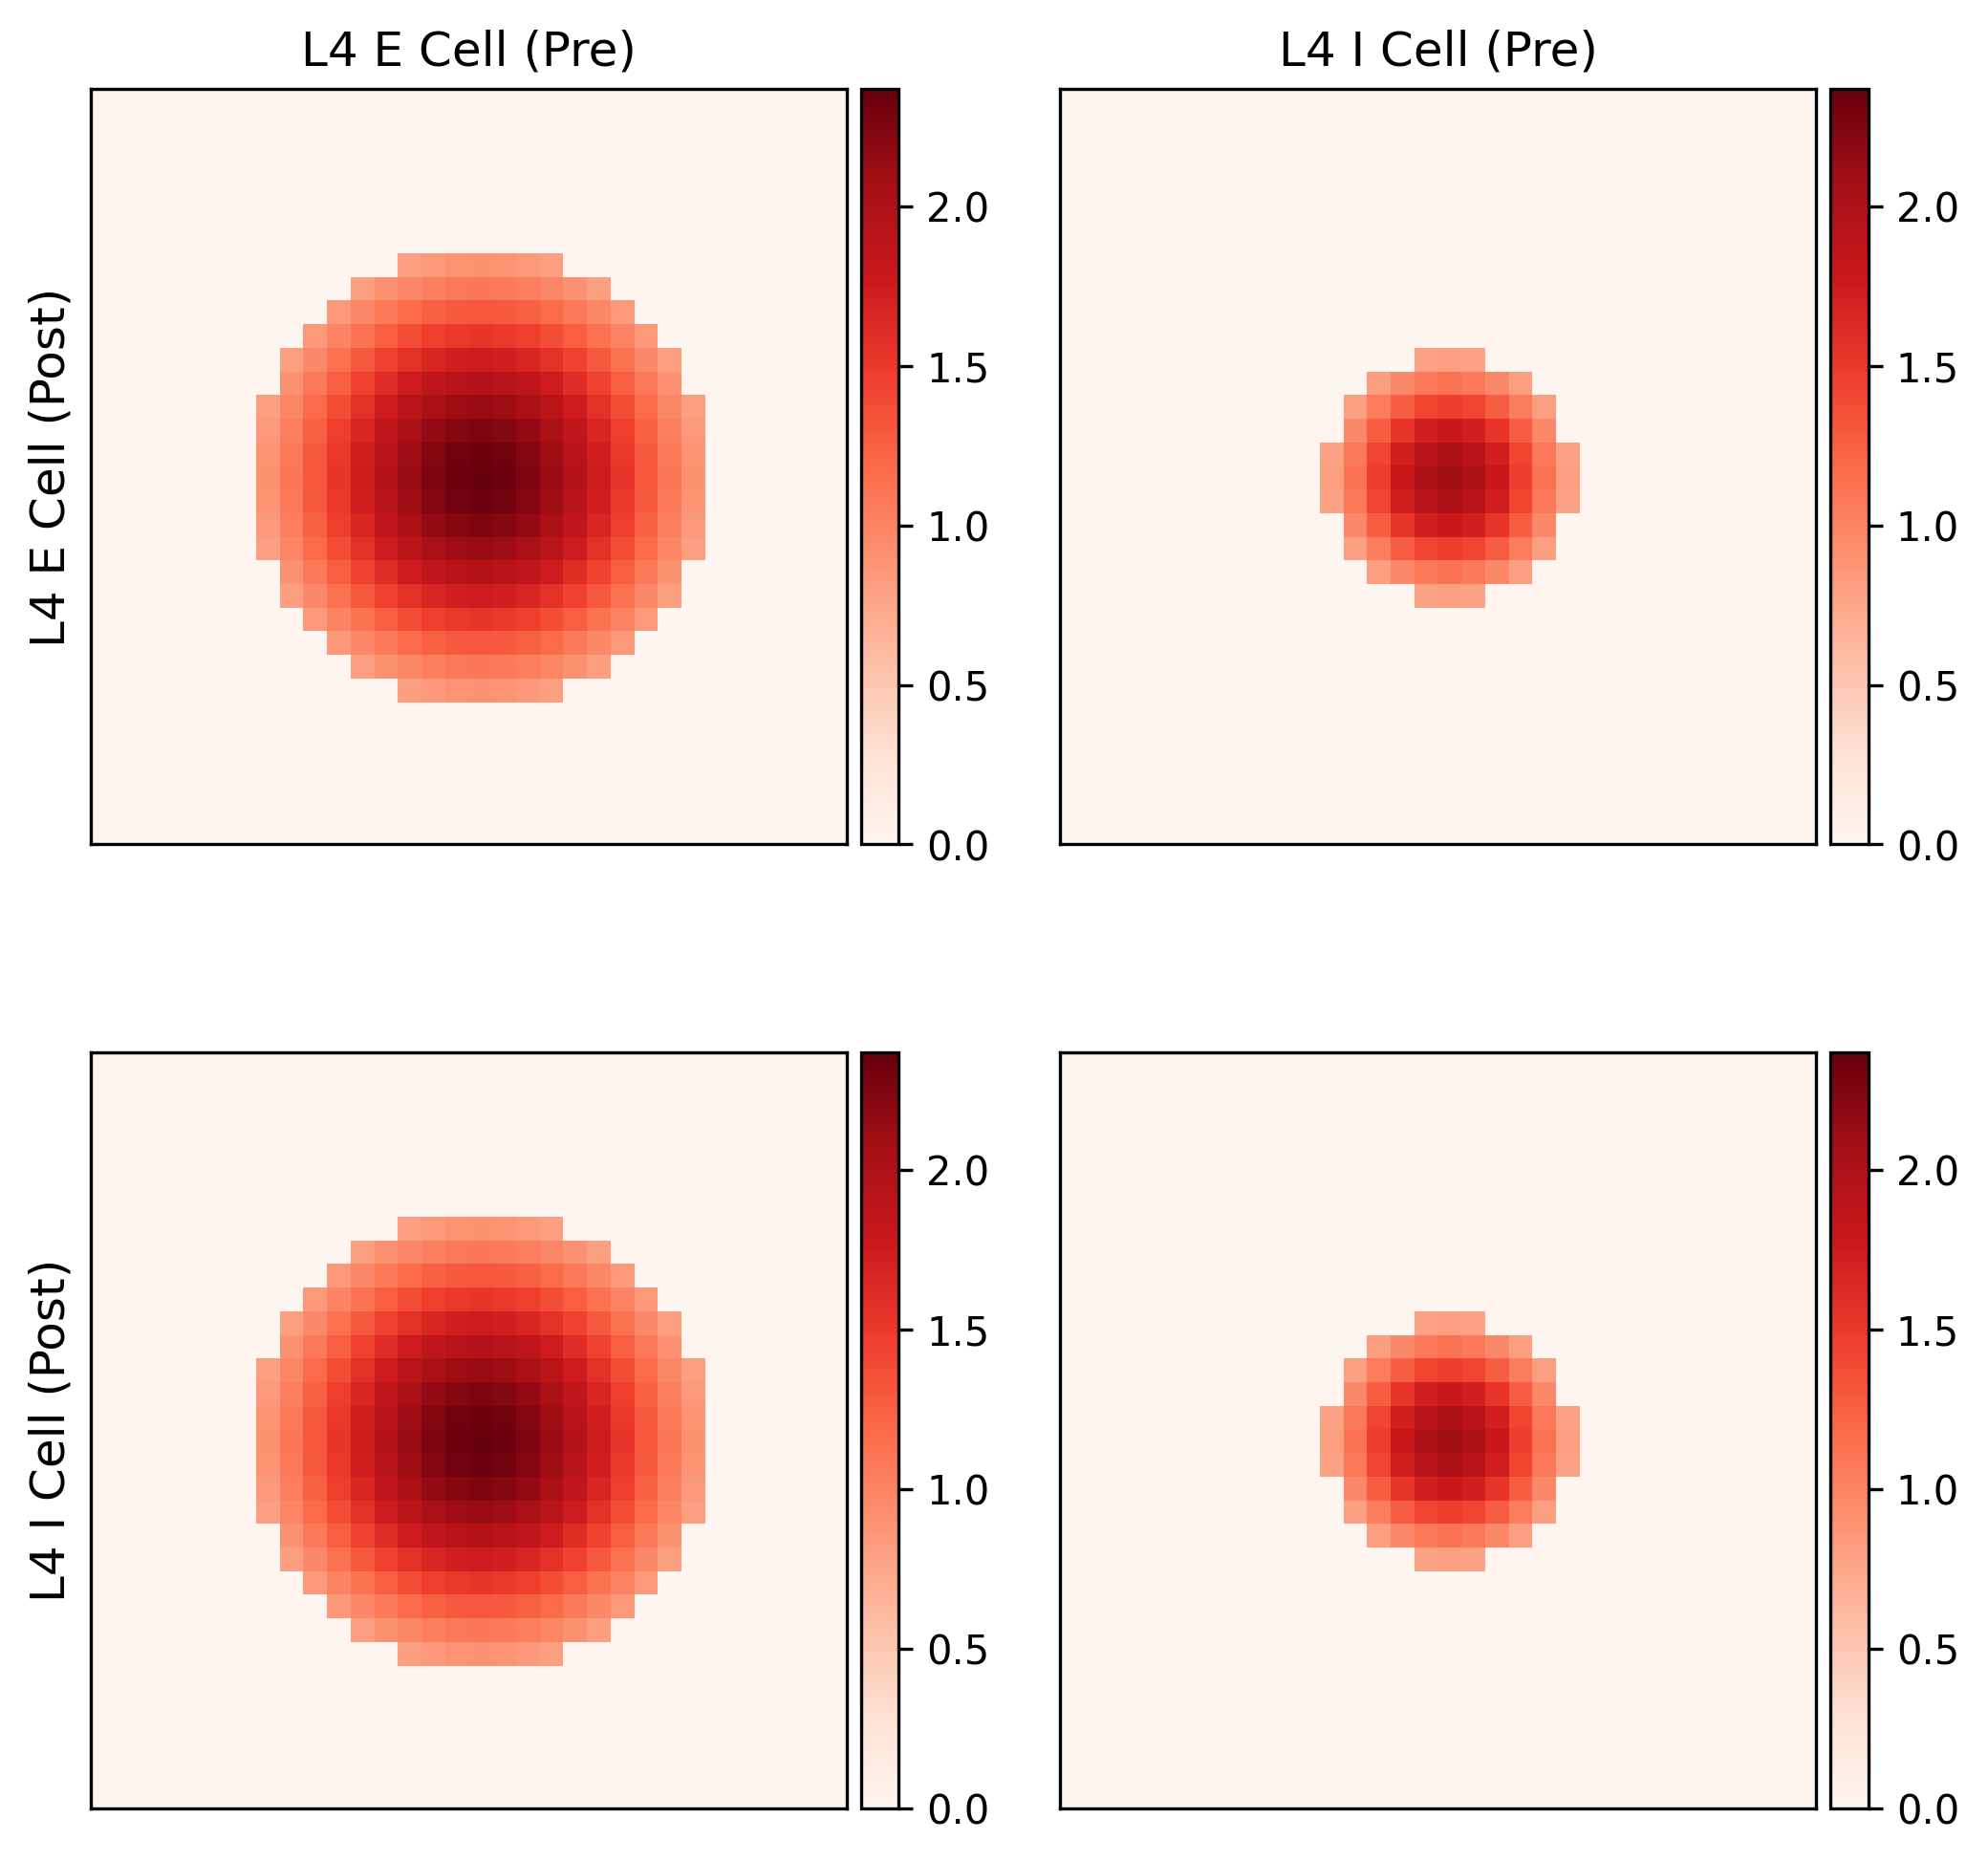

In [60]:
fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=300)
fig.subplots_adjust(hspace=.2, wspace=.2)

pf.imshowbar(fig,axs[0,0],arbor4to4[:N4**2,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor4to4)),cmap='Reds')
pf.imshowbar(fig,axs[0,1],arbor4to4[:N4**2,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor4to4)),cmap='Reds')
pf.imshowbar(fig,axs[1,0],arbor4to4[N4**2:,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor4to4)),cmap='Reds')
pf.imshowbar(fig,axs[1,1],arbor4to4[N4**2:,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:],
          vmin=0,vmax=np.max(np.abs(arbor4to4)),cmap='Reds')
print(np.sum(W4to4[:N4**2,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[:N4**2,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[N4**2:,:N4**2].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
print(np.sum(W4to4[N4**2:,N4**2:].reshape(N4,N4,Nlgn,Nlgn)[N4//2,N4//2,:,:]))
axs[0,0].set_ylabel('L4 E Cell (Post)',fontsize=12)
axs[1,0].set_ylabel('L4 I Cell (Post)',fontsize=12)
axs[0,0].set_title('L4 E Cell (Pre)',fontsize=12)
axs[0,1].set_title('L4 I Cell (Pre)',fontsize=12)

In [25]:
reload(misc)

<module 'dev_ori_sel_RF.tools.misc' from '/Users/tuannguyen/OrientationSSB/notebooks/./../dev_ori_sel_RF/tools/misc.py'>

In [26]:
reload(run_full_plastic)
# reload(integrator_tf)
Version = 0
run_full_plastic.parameter_sweep_layer4(Version,config_dict,not_saving_temp=False)

Please install GPU version of TF
# of stimuli: 16
mode in get_RFs initializegauss
CHECK radius 0.15
CHECK radius 0.15
mode in get_RFs initializegauss
CHECK radius 0.15
CHECK radius 0.15
mode in get_RFs initializegauss
CHECK radius 0.25
mode in get_RFs initializegauss
CHECK radius 0.25
mode in get_RFs initializegauss
CHECK radius 0.15
mode in get_RFs initializegauss
CHECK radius 0.15
W4to4 (800, 800)
constraint_vec (2398, 96800)
[Errno 2] No such file or directory: '/Users/tuannguyen/OrientationSSB/dev_ori_sel_RF/data/layer4/P_orth/N420_rec_rAon0.25_rAoff0.0_rlim2.0_gaussian.npy'
No file found for projection operator
 generating operator now...


AttributeError: 'bool' object has no attribute 'astype'